## Importing Libraries

In [ ]:
# Install necessary packages
%pip install ultralytics roboflow

In [ ]:
import torch
from ultralytics import YOLO
import matplotlib.pyplot as plt
import numpy as np
import os
import yaml
from PIL import Image
import seaborn as sns
import pandas as pd
from collections import defaultdict

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
# Check CUDA availability
print("PyTorch CUDA version:", torch.version.cuda)
print("Is CUDA available:", torch.cuda.is_available())

PyTorch CUDA version: 12.4
Is CUDA available: True


## EDA

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="YriFKiGcID6ALJ22L6Hp")
project = rf.workspace("valorant-enemy-enemy-head-detection").project("valorant-iuuzs")
version = project.version(2)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Valorant--2 in yolov8:: 100%|██████████| 1246/1246 [00:00<00:00, 2448.10it/s]


In [ ]:
# Define dataset path
dataset_path = "/content/Valorant--2"
data_yaml_path = os.path.join(dataset_path, "data.yaml")

In [ ]:
# Load dataset information
with open(data_yaml_path, "r") as file:
    data = yaml.safe_load(file)

In [ ]:
# EDA: Class Distribution
def plot_class_distribution(data):
    class_names = data["names"]
    class_counts = {class_name: 0 for class_name in class_names}

     # Count annotations for each class
    for split in ["train"]:
        labels_dir = os.path.join(dataset_path, split, "labels")
        if not os.path.exists(labels_dir):
            continue
        for label_file in os.listdir(labels_dir):
            with open(os.path.join(labels_dir, label_file), "r") as f:
                for line in f:
                    class_id = int(line.split()[0])
                    class_counts[class_names[class_id]] += 1

    # Plot class distribution
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))
    plt.title("Class Distribution in Dataset")
    plt.xlabel("Class")
    plt.ylabel("Number of Annotations")
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
# EDA: Image Size Distribution
def plot_image_size_distribution(dataset_path):
    image_sizes = []
    for split in ["train"]:
        images_dir = os.path.join(dataset_path, split, "images")
        if not os.path.exists(images_dir):
            continue
        for image_file in os.listdir(images_dir):
            image_path = os.path.join(images_dir, image_file)
            with Image.open(image_path) as img:
                image_sizes.append(img.size)

    # Plot image size distribution
    widths, heights = zip(*image_sizes)
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=widths, y=heights, alpha=0.5)
    plt.title("Image Size Distribution")
    plt.xlabel("Width")
    plt.ylabel("Height")
    plt.show()


In [ ]:
 #EDA 3: Number of Objects per Image
def plot_objects_per_image(dataset_path, data):
    objects_per_image = defaultdict(int)
    class_names = data["names"]

    for split in ["train"]:
        labels_dir = os.path.join(dataset_path, split, "labels")
        if not os.path.exists(labels_dir):
            continue
        for label_file in os.listdir(labels_dir):
            with open(os.path.join(labels_dir, label_file), "r") as f:
                objects_per_image[split] += len(f.readlines())

    # Plot objects per image
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(objects_per_image.keys()), y=list(objects_per_image.values()))
    plt.title("Number of Objects per Image (by Split)")
    plt.xlabel("Dataset Split")
    plt.ylabel("Number of Objects")
    plt.show()

In [ ]:
# EDA 4: Annotation Format Check
def check_annotation_format(dataset_path):
    for split in ["train"]:
        labels_dir = os.path.join(dataset_path, split, "labels")
        if not os.path.exists(labels_dir):
            continue
        for label_file in os.listdir(labels_dir):
            with open(os.path.join(labels_dir, label_file), "r") as f:
                for line in f:
                    parts = line.strip().split()
                    if len(parts) != 5:
                        print(f"Invalid annotation format in {label_file}: {line}")
                        return
    print("All annotations are in the correct format (class_id, x_center, y_center, width, height).")

In [ ]:
# EDA 4: Annotation Format Check
def check_annotation_format(dataset_path):
    for split in ["train"]:
        labels_dir = os.path.join(dataset_path, split, "labels")
        if not os.path.exists(labels_dir):
            continue
        for label_file in os.listdir(labels_dir):
            with open(os.path.join(labels_dir, label_file), "r") as f:
                for line in f:
                    parts = line.strip().split()
                    if len(parts) != 5:
                        print(f"Invalid annotation format in {label_file}: {line}")
                        return
    print("All annotations are in the correct format (class_id, x_center, y_center, width, height).")

In [ ]:
# EDA 5: Aspect Ratio Distribution
def plot_aspect_ratio_distribution(dataset_path):
    aspect_ratios = []
    for split in ["train"]:
        labels_dir = os.path.join(dataset_path, split, "labels")
        if not os.path.exists(labels_dir):
            continue
        for label_file in os.listdir(labels_dir):
            with open(os.path.join(labels_dir, label_file), "r") as f:
                for line in f:
                    _, x_center, y_center, width, height = map(float, line.strip().split())
                    aspect_ratios.append(width / height)

    # Plot aspect ratio distribution
    plt.figure(figsize=(10, 6))
    sns.histplot(aspect_ratios, bins=50, kde=True)
    plt.title("Aspect Ratio Distribution of Annotations")
    plt.xlabel("Aspect Ratio (Width / Height)")
    plt.ylabel("Frequency")
    plt.show()


In [ ]:
# EDA 6: Object Size Distribution
def plot_object_size_distribution(dataset_path):
    object_sizes = []
    for split in ["train"]:
        labels_dir = os.path.join(dataset_path, split, "labels")
        if not os.path.exists(labels_dir):
            continue
        for label_file in os.listdir(labels_dir):
            with open(os.path.join(labels_dir, label_file), "r") as f:
                for line in f:
                    _, x_center, y_center, width, height = map(float, line.strip().split())
                    object_sizes.append(width * height)

    # Plot object size distribution
    plt.figure(figsize=(10, 6))
    sns.histplot(object_sizes, bins=50, kde=True)
    plt.title("Object Size Distribution (Width * Height)")
    plt.xlabel("Object Size")
    plt.ylabel("Frequency")
    plt.show()

In [ ]:
# EDA 7: Number of Images per Split
def plot_images_per_split(dataset_path):
    images_per_split = {}
    for split in ["train"]:
        images_dir = os.path.join(dataset_path, split, "images")
        if not os.path.exists(images_dir):
            continue
        images_per_split[split] = len(os.listdir(images_dir))

    # Plot images per split
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(images_per_split.keys()), y=list(images_per_split.values()))
    plt.title("Number of Images per Split")
    plt.xlabel("Dataset Split")
    plt.ylabel("Number of Images")
    plt.show()

In [ ]:
# EDA 8: Class Co-occurrence
def plot_class_co_occurrence(dataset_path, data):
    class_names = data["names"]
    co_occurrence = defaultdict(int)

    for split in ["train"]:
        labels_dir = os.path.join(dataset_path, split, "labels")
        if not os.path.exists(labels_dir):
            continue
        for label_file in os.listdir(labels_dir):
            with open(os.path.join(labels_dir, label_file), "r") as f:
                classes_in_image = set()
                for line in f:
                    class_id = int(line.split()[0])
                    classes_in_image.add(class_names[class_id])
                for class_name in classes_in_image:
                    co_occurrence[class_name] += 1

    # Plot class co-occurrence
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(co_occurrence.keys()), y=list(co_occurrence.values()))
    plt.title("Class Co-occurrence in Images")
    plt.xlabel("Class")
    plt.ylabel("Number of Images")
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
# EDA 9: Annotation Density per Image
def plot_annotation_density(dataset_path):
    densities = []
    for split in ["train"]:
        labels_dir = os.path.join(dataset_path, split, "labels")
        images_dir = os.path.join(dataset_path, split, "images")
        if not os.path.exists(labels_dir) or not os.path.exists(images_dir):
            continue
        for label_file in os.listdir(labels_dir):
            with open(os.path.join(labels_dir, label_file), "r") as f:
                num_annotations = len(f.readlines())
            image_path = os.path.join(images_dir, label_file.replace(".txt", ".jpg"))
            with Image.open(image_path) as img:
                width, height = img.size
                densities.append(num_annotations / (width * height))

    # Plot annotation density
    plt.figure(figsize=(10, 6))
    sns.histplot(densities, bins=50, kde=True)
    plt.title("Annotation Density per Image")
    plt.xlabel("Density (Annotations per Pixel)")
    plt.ylabel("Frequency")
    plt.show()

In [ ]:
# EDA 10: Missing Annotations Check
def check_missing_annotations(dataset_path):
    missing_annotations = 0
    for split in ["train"]:
        labels_dir = os.path.join(dataset_path, split, "labels")
        images_dir = os.path.join(dataset_path, split, "images")
        if not os.path.exists(labels_dir) or not os.path.exists(images_dir):
            continue
        for image_file in os.listdir(images_dir):
            label_file = image_file.replace(".jpg", ".txt")
            if not os.path.exists(os.path.join(labels_dir, label_file)):
                missing_annotations += 1
    print(f"Number of images with missing annotations: {missing_annotations}")

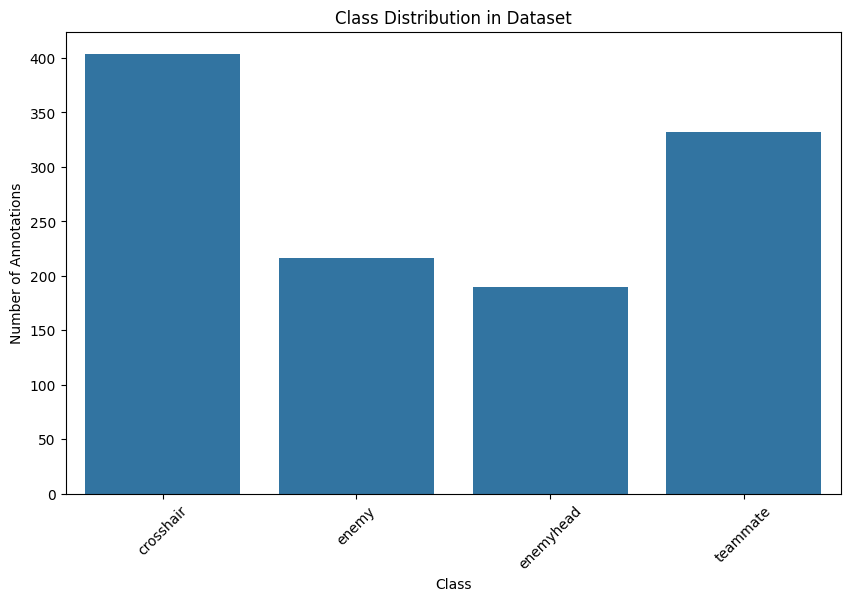

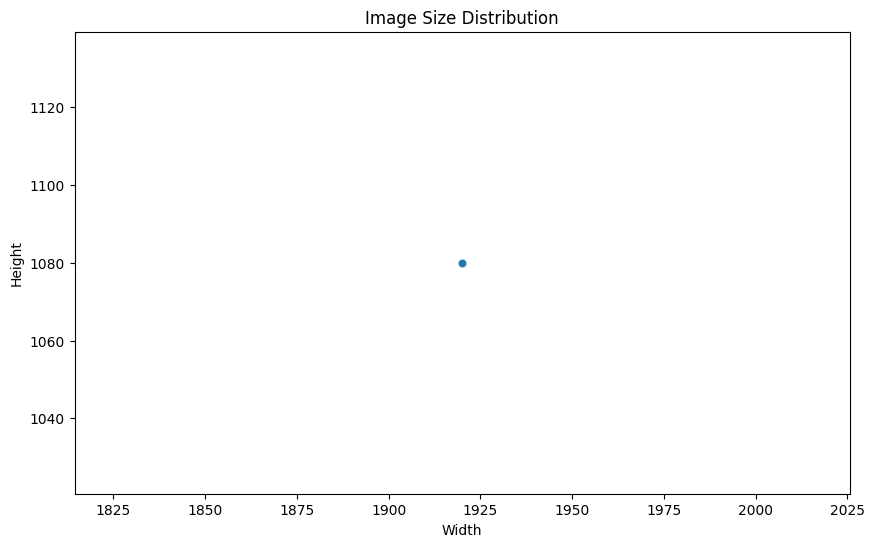

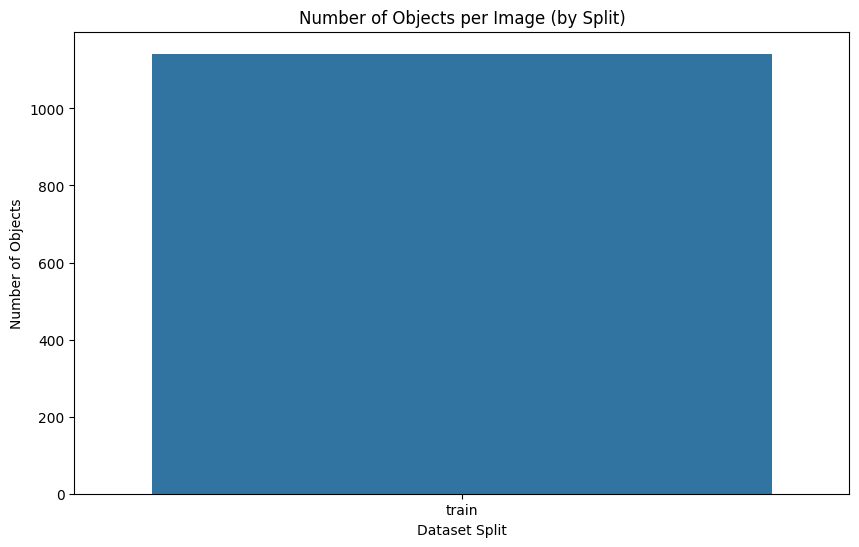

All annotations are in the correct format (class_id, x_center, y_center, width, height).


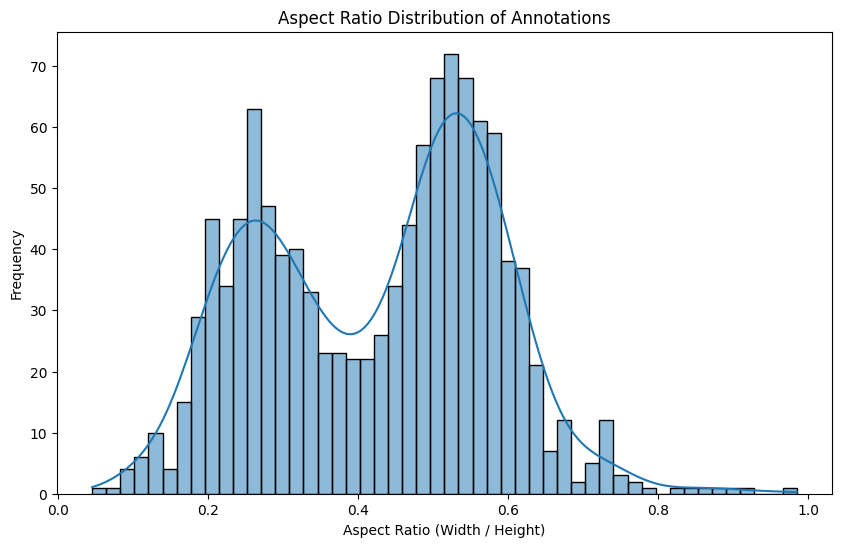

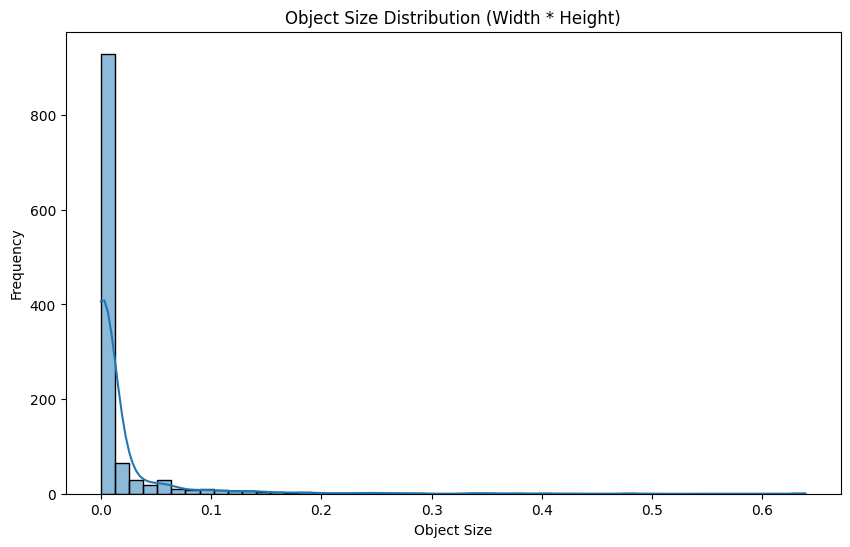

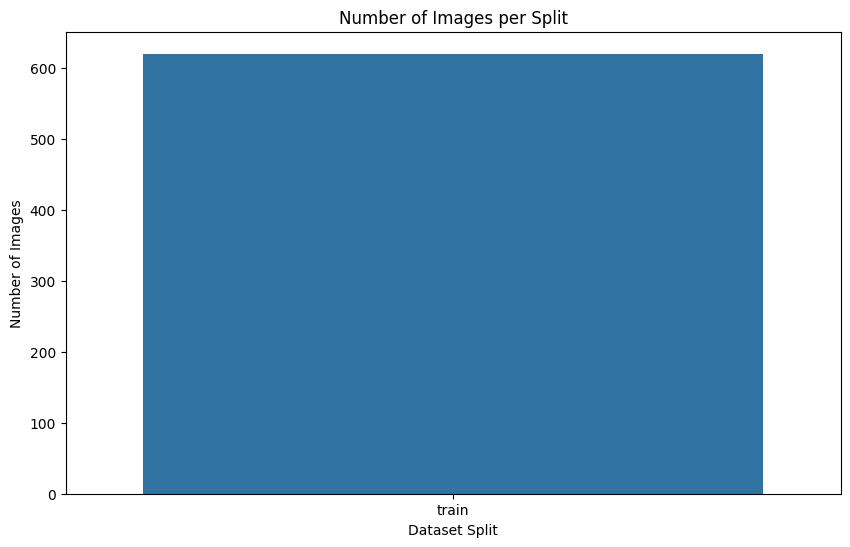

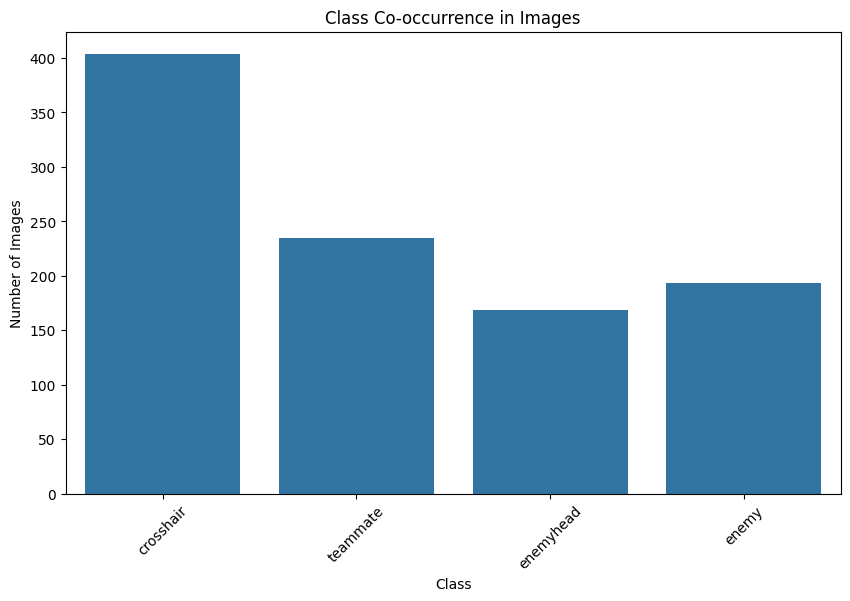

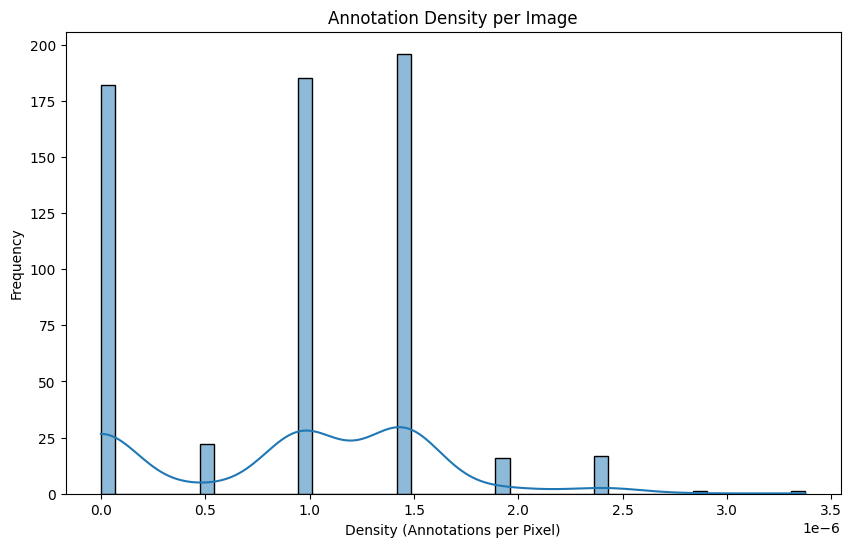

Number of images with missing annotations: 0


In [ ]:
# Run EDA
plot_class_distribution(data)
plot_image_size_distribution(dataset_path)
plot_objects_per_image(dataset_path, data)
check_annotation_format(dataset_path)
plot_aspect_ratio_distribution(dataset_path)
plot_object_size_distribution(dataset_path)
plot_images_per_split(dataset_path)
plot_class_co_occurrence(dataset_path, data)
plot_annotation_density(dataset_path)
check_missing_annotations(dataset_path)

# Preprocessing

### Check for corrupted/missing files.

In [ ]:
import os
from PIL import Image

image_dir = "/content/Valorant--2/train/images"
label_dir = "/content/Valorant--2/train/labels"

# Check for missing/corrupted images or labels
for img_file in os.listdir(image_dir):
    img_path = os.path.join(image_dir, img_file)
    label_path = os.path.join(label_dir, os.path.splitext(img_file)[0] + ".txt")

    # Check if image is corrupted
    try:
        Image.open(img_path).verify()
    except:
        print(f"Corrupted image: {img_file}")
        os.remove(img_path)
    # Check if label exists
    if not os.path.exists(label_path):
        print(f"Missing label for: {img_file}")

### Verify Label Consistency

In [ ]:
def validate_labels(label_dir):
    for label_file in os.listdir(label_dir):
        with open(os.path.join(label_dir, label_file), 'r') as f:
            lines = f.readlines()
            for line in lines:
                parts = line.strip().split()
                if len(parts) != 5:
                    print(f"Invalid label in {label_file}: {line}")
                elif not all(0 <= float(x) <= 1 for x in parts[1:]):
                    print(f"Invalid coordinates in {label_file}: {line}")

validate_labels(label_dir)

### Normalize Image Sizes

In [ ]:
target_size = (640, 640)  # YOLOv8 default

for img_file in os.listdir(image_dir):
    img_path = os.path.join(image_dir, img_file)
    img = Image.open(img_path)
    img = img.resize(target_size, Image.Resampling.LANCZOS)
    img.save(img_path)  # Overwrite or save to a new directory

### Balance Classes

In [ ]:
import os

label_dir = "/content/Valorant--2/train/labels"
unique_classes = set()

for label_file in os.listdir(label_dir):
    with open(os.path.join(label_dir, label_file), 'r') as f:
        for line in f.readlines():
            class_id = int(line.split()[0])
            unique_classes.add(class_id)

print("Unique class IDs in your dataset:", sorted(unique_classes))

Unique class IDs in your dataset: [0, 1, 2, 3]


In [ ]:
class_counts = {
    0: 0,  # Enemy
    1: 0,  # Enemy Head
    2: 0,  # Teammate
    3: 0   # Crosshair
}

In [ ]:
for label_file in os.listdir(label_dir):
    with open(os.path.join(label_dir, label_file), 'r') as f:
        for line in f.readlines():
            class_id = int(line.split()[0])
            class_counts[class_id] += 1

print("Class distribution:", class_counts)

Class distribution: {0: 404, 1: 216, 2: 190, 3: 332}


In [ ]:
import pandas as pd

# Count class instances
class_counts = {0: 0, 1: 0, 2: 0, 3: 0}

for label_file in os.listdir(label_dir):
    with open(os.path.join(label_dir, label_file), 'r') as f:
        for line in f.readlines():
            class_id = int(line.split()[0])
            class_counts[class_id] += 1

print("Class distribution:", class_counts)

# If imbalance is severe (e.g., crosshair samples << enemies), duplicate rare-class images/labels.

Class distribution: {0: 404, 1: 216, 2: 190, 3: 332}


# Data Augmentation

### Identify Images Containing Rare Classes

In [ ]:
import os
import random
from shutil import copyfile

image_dir = "/content/Valorant--2/train/images"
label_dir = "/content/Valorant--2/train/labels"

# Find all files containing a specific class
def get_files_with_class(class_id):
    files = []
    for label_file in os.listdir(label_dir):
        with open(os.path.join(label_dir, label_file), 'r') as f:
            for line in f.readlines():
                if int(line.split()[0]) == class_id:
                    files.append(label_file)
                    break
    return files

# Example: Get files containing class 2 (Teammate)
class2_files = get_files_with_class(2)
print(f"Found {len(class2_files)} images with class 2.")

Found 169 images with class 2.


### Upsample Rare Classes

In [ ]:
def upsample_class(class_id, current_count, target_count):
    files = get_files_with_class(class_id)
    needed = target_count - current_count
    copies = (needed // len(files)) + 1
    for _ in range(copies):
        for file in files:
            if needed <= 0:
                break
            # Duplicate image and label
            base_name = os.path.splitext(file)[0]
            img_src = os.path.join(image_dir, base_name + ".jpg")
            label_src = os.path.join(label_dir, file)

            new_base = f"{base_name}_aug_{random.randint(0, 9999):04d}"
            img_dst = os.path.join(image_dir, new_base + ".jpg")
            label_dst = os.path.join(label_dir, new_base + ".txt")

            copyfile(img_src, img_dst)
            copyfile(label_src, label_dst)
            needed -= 1

# Upsample classes
upsample_class(1, 432, 808)  # Class 1 (Enemy Head)
upsample_class(2, 380, 808)  # Class 2 (Teammate)
upsample_class(3, 664, 808)  # Class 3 (Crosshair)

### Augment Upsampled Images

In [ ]:
import cv2
import numpy as np

def augment_image(img_path, label_path):
    img = cv2.imread(img_path)
    h, w = img.shape[:2]

    # Random horizontal flip (50% chance)
    if random.random() > 0.5:
        img = cv2.flip(img, 1)
        # Update labels (flip x-coordinates)
        with open(label_path, 'r') as f:
            lines = f.readlines()
        with open(label_path, 'w') as f:
            for line in lines:
                parts = line.split()
                parts[1] = str(1.0 - float(parts[1]))  # Flip x_center
                f.write(" ".join(parts) + "\n")

    # Random brightness/contrast
    alpha = random.uniform(0.8, 1.2)  # Contrast (1.0 = no change)
    beta = random.uniform(-20, 20)    # Brightness
    img = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)

    # Save augmented image
    cv2.imwrite(img_path, img)

# Apply augmentation to upsampled files only
for label_file in os.listdir(label_dir):
    if "_aug_" in label_file:  # Only augment upsampled files
        base_name = os.path.splitext(label_file)[0]
        img_path = os.path.join(image_dir, base_name + ".jpg")
        label_path = os.path.join(label_dir, label_file)
        augment_image(img_path, label_path)

In [ ]:
class_counts = {0: 0, 1: 0, 2: 0, 3: 0}
for label_file in os.listdir(label_dir):
    with open(os.path.join(label_dir, label_file), 'r') as f:
        for line in f.readlines():
            class_id = int(line.split()[0])
            class_counts[class_id] += 1
print("New class distribution:", class_counts)

New class distribution: {0: 1271, 1: 1147, 2: 1058, 3: 551}


In [ ]:
# EDA: Class Distribution
def plot_class_distribution(data):
    class_names = data["names"]
    class_counts = {class_name: 0 for class_name in class_names}

     # Count annotations for each class
    for split in ["train"]:
        labels_dir = os.path.join(dataset_path, split, "labels")
        if not os.path.exists(labels_dir):
            continue
        for label_file in os.listdir(labels_dir):
            with open(os.path.join(labels_dir, label_file), "r") as f:
                for line in f:
                    class_id = int(line.split()[0])
                    class_counts[class_names[class_id]] += 1

    # Plot class distribution
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))
    plt.title("After Augmentation - Class Distribution in Dataset")
    plt.xlabel("Class")
    plt.ylabel("Number of Annotations")
    plt.xticks(rotation=45)
    plt.show()

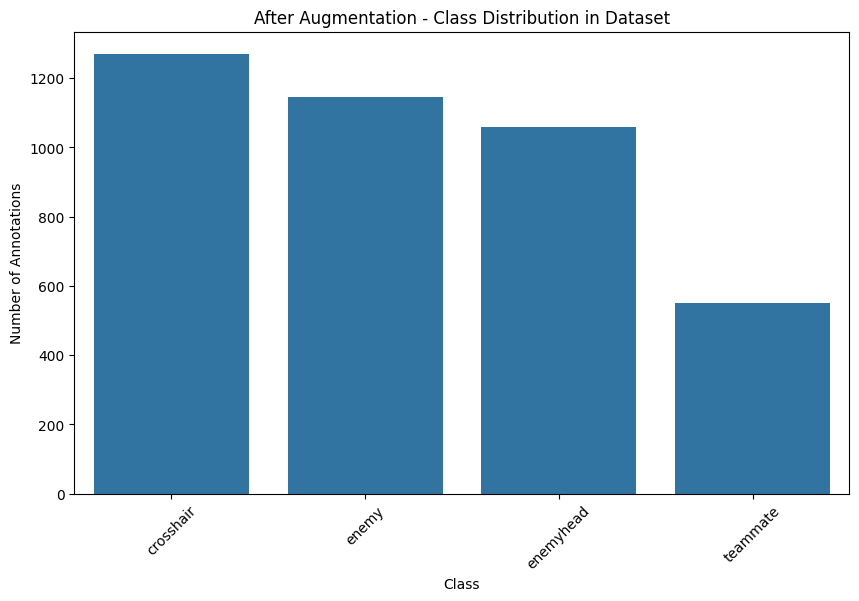

In [ ]:
plot_class_distribution(data)

# Train Test Valid Split

In [ ]:
import os

os.makedirs("valorant/valid/images", exist_ok=True)
os.makedirs("valorant/valid/labels", exist_ok=True)
os.makedirs("valorant/test/images", exist_ok=True)
os.makedirs("valorant/test/labels", exist_ok=True)

In [ ]:
import random
from shutil import copyfile
from sklearn.model_selection import train_test_split
import os

# Paths
image_dir = "/content/Valorant--2/train/images"
label_dir = "/content/Valorant--2/train/labels"

# Create necessary directories if they don't exist
os.makedirs("valorant/train/images", exist_ok=True)
os.makedirs("valorant/train/labels", exist_ok=True)
os.makedirs("valorant/valid/images", exist_ok=True)
os.makedirs("valorant/valid/labels", exist_ok=True)
os.makedirs("valorant/test/images", exist_ok=True)
os.makedirs("valorant/test/labels", exist_ok=True)


# Get all image files and their corresponding labels
image_files = [f for f in os.listdir(image_dir) if f.endswith(".jpg")]
label_files = [f.replace(".jpg", ".txt") for f in image_files]

# Split into train (80%), temp (20%)
train_images, temp_images, train_labels, temp_labels = train_test_split(
    image_files, label_files, test_size=0.2, random_state=42, stratify=None
)

# Split temp into val (15% of total) and test (5% of total)
val_images, test_images, val_labels, test_labels = train_test_split(
    temp_images, temp_labels, test_size=0.25, random_state=42, stratify=None
)

# Function to copy files to target directories
def copy_files(files, src_img_dir, src_label_dir, dest_img_dir, dest_label_dir):
    for img_file, label_file in zip(files, [f.replace(".jpg", ".txt") for f in files]):
        copyfile(f"{src_img_dir}/{img_file}", f"{dest_img_dir}/{img_file}")
        copyfile(f"{src_label_dir}/{label_file}", f"{dest_label_dir}/{label_file}")

# Copy files to respective folders
copy_files(train_images, image_dir, label_dir, "valorant/train/images", "valorant/train/labels")
copy_files(val_images, image_dir, label_dir, "valorant/valid/images", "valorant/valid/labels")
copy_files(test_images, image_dir, label_dir, "valorant/test/images", "valorant/test/labels")

In [ ]:
def count_classes(label_folder):
    class_counts = {'0': 0, '1': 0, '2': 0, '3': 0}
    for label_file in os.listdir(label_folder):
        with open(f"{label_folder}/{label_file}", 'r') as f:
            for line in f.readlines():
                class_id = line.split()[0]
                class_counts[class_id] += 1
    return class_counts

# Print counts
print("Train counts:", count_classes("valorant/train/labels"))
print("Val counts:", count_classes("valorant/valid/labels"))
print("Test counts:", count_classes("valorant/test/labels"))

Train counts: {'0': 1015, '1': 905, '2': 831, '3': 438}
Val counts: {'0': 193, '1': 185, '2': 176, '3': 79}
Test counts: {'0': 63, '1': 57, '2': 51, '3': 34}


In [ ]:
import os

image_dir = "valorant/train/images"
label_dir = "valorant/train/labels"

missing_labels = []
for img_file in os.listdir(image_dir):
    label_file = os.path.splitext(img_file)[0] + ".txt"
    if not os.path.exists(os.path.join(label_dir, label_file)):
        missing_labels.append(img_file)

print(f"Missing labels for {len(missing_labels)} images. Examples: {missing_labels[:5]}")

Missing labels for 0 images. Examples: []


In [ ]:
import os

train_labels = os.listdir("/content/valorant/train/labels")
valid_labels = os.listdir("/content/valorant/valid/labels")

print(f"Training Labels Found: {len(train_labels)}")
print(f"Validation Labels Found: {len(valid_labels)}")


Training Labels Found: 1254
Validation Labels Found: 235


In [ ]:
train_labels = os.listdir("/content/valorant/train/labels")
print(f"Training Labels Found: {len(train_labels)}")

Training Labels Found: 1254


In [ ]:
import glob

train_images = glob.glob("/content/valorant/train/images/*.jpg")
train_labels = glob.glob("/content/valorant/train/labels/*.txt")

print(f"Training Images Found: {len(train_images)}")
print(f"Training Labels Found: {len(train_labels)}")

Training Images Found: 1254
Training Labels Found: 1254


In [ ]:


import os

# Create the directory if it doesn't exist
os.makedirs("/content/valorant", exist_ok=True)

# Define the data.yaml content
data_yaml_content = """
train: /content/valorant/train/images
val: /content/valorant/valid/images
test: /content/valorant/test/images
# Classes
nc: 4
names: ['crosshair', 'enemy', 'enemyhead', 'teammate']
"""

# Write the content to data.yaml
with open("/content/valorant/data.yaml", "w") as f:
  f.write(data_yaml_content)


# Training

In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Model variants to train
models = ['yolov8n.pt', 'yolov8s.pt', 'yolov8m.pt', 'yolov8l.pt', 'yolov8x.pt']
results = {}

for model_name in models:
    # Load model
    model = YOLO(model_name)

    # Train
    result = model.train(
        data='/content/valorant/data.yaml',
        epochs=50,
        imgsz=640,
        batch=16,
        name=f'{model_name.split(".")[0]}_valorant'
    )

    # Store results
    # Access metrics from result.results_dict instead of result.results
    results[model_name] = {
        'mAP50': result.results_dict['metrics/mAP50(B)'],
        'speed': result.speed['inference']
    }

# Print results
for model, metrics in results.items():
    print(f"{model}: mAP50={metrics['mAP50']:.2f}, Speed={metrics['speed']:.2f}ms")

Ultralytics 8.3.100 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/valorant/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8n_valorant10, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=T

train: Scanning /content/valorant/train/labels.cache... 1254 images, 153 backgrounds, 0 corrupt: 100%|██████████| 1254/1254 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/valorant/valid/labels.cache... 235 images, 15 backgrounds, 0 corrupt: 100%|██████████| 235/235 [00:00<?, ?it/s]


Plotting labels to runs/detect/yolov8n_valorant10/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolov8n_valorant10
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.54G      1.798      3.969      1.283         11        640: 100%|██████████| 79/79 [00:23<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.77it/s]


                   all        235        641      0.932     0.0334      0.152     0.0783

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      3.01G      1.732      2.815      1.243         36        640: 100%|██████████| 79/79 [00:22<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.49it/s]

                   all        235        641      0.407      0.317      0.296      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      3.01G      1.737       2.35      1.284         31        640: 100%|██████████| 79/79 [00:20<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.70it/s]

                   all        235        641      0.734      0.366      0.385      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      3.01G       1.78      2.096      1.296         17        640: 100%|██████████| 79/79 [00:21<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.25it/s]


                   all        235        641      0.833      0.349       0.41      0.206

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      3.01G       1.72      1.753      1.273         24        640: 100%|██████████| 79/79 [00:21<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.64it/s]

                   all        235        641      0.748      0.405      0.437      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      3.01G       1.67      1.602      1.253         33        640: 100%|██████████| 79/79 [00:22<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.23it/s]

                   all        235        641      0.562       0.45      0.465       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      3.01G      1.596      1.449      1.235         16        640: 100%|██████████| 79/79 [00:21<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.11it/s]

                   all        235        641      0.813      0.442      0.504      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      3.01G      1.591       1.35      1.209         15        640: 100%|██████████| 79/79 [00:22<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.24it/s]

                   all        235        641      0.898      0.438      0.523      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      3.01G      1.576      1.299      1.206         20        640: 100%|██████████| 79/79 [00:22<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.85it/s]

                   all        235        641      0.701      0.435       0.51      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      3.01G      1.558      1.236      1.182         22        640: 100%|██████████| 79/79 [00:23<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.93it/s]

                   all        235        641      0.575      0.476       0.52      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      3.01G      1.526      1.176      1.162         24        640: 100%|██████████| 79/79 [00:21<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.95it/s]

                   all        235        641      0.599      0.489      0.554      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      3.01G      1.469      1.132      1.154         27        640: 100%|██████████| 79/79 [00:20<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.23it/s]

                   all        235        641      0.896       0.51      0.569      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      3.01G      1.481      1.157      1.158         29        640: 100%|██████████| 79/79 [00:20<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.80it/s]

                   all        235        641      0.779      0.539       0.56      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      3.01G      1.404      1.052      1.117         20        640: 100%|██████████| 79/79 [00:20<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.90it/s]

                   all        235        641      0.623      0.489       0.55      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      3.01G      1.423      1.069      1.131         13        640: 100%|██████████| 79/79 [00:21<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.07it/s]

                   all        235        641      0.574      0.491       0.56      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      3.01G      1.397       1.05      1.121         23        640: 100%|██████████| 79/79 [00:21<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.06it/s]

                   all        235        641      0.621       0.53      0.584      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      3.01G      1.399      1.046      1.108         22        640: 100%|██████████| 79/79 [00:21<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.18it/s]

                   all        235        641      0.631      0.548      0.589       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      3.01G       1.35     0.9719      1.091         17        640: 100%|██████████| 79/79 [00:21<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.81it/s]

                   all        235        641      0.644      0.521      0.599      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      3.01G      1.333     0.9419      1.082         28        640: 100%|██████████| 79/79 [00:20<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.70it/s]

                   all        235        641      0.706      0.554      0.592      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      3.01G      1.344     0.9422      1.057         13        640: 100%|██████████| 79/79 [00:22<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.74it/s]

                   all        235        641      0.602      0.549      0.583      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      3.01G      1.313     0.9291      1.075         42        640: 100%|██████████| 79/79 [00:20<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.06it/s]

                   all        235        641      0.655      0.538      0.598      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      3.01G      1.318     0.8992      1.063         19        640: 100%|██████████| 79/79 [00:21<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.09it/s]

                   all        235        641      0.716      0.563       0.59      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      3.01G      1.296     0.8944      1.062         17        640: 100%|██████████| 79/79 [00:21<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.14it/s]

                   all        235        641      0.699      0.544      0.605      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      3.01G      1.246     0.8453      1.046         20        640: 100%|██████████| 79/79 [00:21<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.11it/s]

                   all        235        641      0.763      0.566      0.617      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      3.01G      1.244     0.8473      1.032         19        640: 100%|██████████| 79/79 [00:21<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.11it/s]

                   all        235        641      0.647      0.591      0.615      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      3.01G      1.234     0.8434      1.035          9        640: 100%|██████████| 79/79 [00:20<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.83it/s]

                   all        235        641      0.623      0.569      0.607      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      3.01G      1.209      0.795       1.03         32        640: 100%|██████████| 79/79 [00:20<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.58it/s]

                   all        235        641      0.637      0.584      0.615      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      3.01G      1.211     0.8029       1.04         12        640: 100%|██████████| 79/79 [00:21<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.13it/s]

                   all        235        641      0.711       0.59      0.626      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      3.01G      1.164     0.7859          1         35        640: 100%|██████████| 79/79 [00:21<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.93it/s]

                   all        235        641      0.611       0.58      0.619      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      3.01G      1.191     0.7881      1.021         12        640: 100%|██████████| 79/79 [00:21<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.89it/s]

                   all        235        641      0.656      0.596      0.627       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      3.01G      1.164     0.7413      1.008         15        640: 100%|██████████| 79/79 [00:21<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.06it/s]

                   all        235        641      0.726      0.601      0.628      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      3.01G      1.147     0.7539      1.016         15        640: 100%|██████████| 79/79 [00:20<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.27it/s]

                   all        235        641      0.713      0.596      0.622      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      3.01G      1.113     0.7254     0.9952         24        640: 100%|██████████| 79/79 [00:20<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.67it/s]

                   all        235        641      0.709      0.593      0.635      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      3.01G      1.103     0.7254     0.9906         24        640: 100%|██████████| 79/79 [00:20<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.88it/s]

                   all        235        641      0.621      0.605      0.626      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      3.01G      1.123     0.7264      1.002         21        640: 100%|██████████| 79/79 [00:20<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.04it/s]

                   all        235        641      0.665      0.601      0.623      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      3.01G      1.112     0.7103      0.985         20        640: 100%|██████████| 79/79 [00:21<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.06it/s]

                   all        235        641      0.716      0.592      0.638      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      3.01G      1.067     0.6983     0.9775         22        640: 100%|██████████| 79/79 [00:21<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.85it/s]

                   all        235        641       0.67      0.592      0.623      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      3.01G      1.046      0.677     0.9775         32        640: 100%|██████████| 79/79 [00:21<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.01it/s]

                   all        235        641      0.665      0.612      0.631      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      3.01G      1.042     0.6563     0.9734         26        640: 100%|██████████| 79/79 [00:20<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.95it/s]

                   all        235        641      0.656      0.603       0.64      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      3.01G      1.002     0.6564     0.9606         33        640: 100%|██████████| 79/79 [00:20<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.29it/s]

                   all        235        641       0.67      0.584      0.637      0.442


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      3.01G      0.962     0.5965      0.932         18        640: 100%|██████████| 79/79 [00:21<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.60it/s]


                   all        235        641      0.672      0.603      0.631      0.436

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      3.01G     0.9586     0.5788     0.9222         12        640: 100%|██████████| 79/79 [00:20<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.05it/s]

                   all        235        641      0.733      0.603      0.643      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      3.01G     0.9157     0.5633     0.9166         18        640: 100%|██████████| 79/79 [00:20<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.17it/s]

                   all        235        641      0.737      0.619       0.65      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      3.01G     0.9375     0.5654     0.9181         17        640: 100%|██████████| 79/79 [00:20<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.21it/s]

                   all        235        641       0.72      0.627      0.644      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      3.01G     0.9029     0.5449     0.9087         12        640: 100%|██████████| 79/79 [00:19<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.55it/s]

                   all        235        641      0.737      0.635      0.654      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      3.01G      0.881     0.5349     0.8989         14        640: 100%|██████████| 79/79 [00:19<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.24it/s]

                   all        235        641      0.709      0.636      0.653      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      3.01G      0.874     0.5379     0.8992         15        640: 100%|██████████| 79/79 [00:20<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.09it/s]

                   all        235        641      0.776      0.635      0.657      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      3.01G     0.8557     0.5245      0.898         14        640: 100%|██████████| 79/79 [00:20<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.98it/s]

                   all        235        641      0.733      0.642      0.662      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      3.01G     0.8439     0.5144     0.8915         16        640: 100%|██████████| 79/79 [00:19<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.70it/s]

                   all        235        641      0.735      0.641       0.66      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      3.01G     0.8236      0.509     0.8833         14        640: 100%|██████████| 79/79 [00:19<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.05it/s]

                   all        235        641      0.761      0.631      0.663      0.474



50 epochs completed in 0.333 hours.
Optimizer stripped from runs/detect/yolov8n_valorant10/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/yolov8n_valorant10/weights/best.pt, 6.2MB

Validating runs/detect/yolov8n_valorant10/weights/best.pt...
Ultralytics 8.3.100 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.10it/s]


                   all        235        641      0.761      0.631      0.663      0.474
             crosshair        202        202      0.414     0.0495      0.078     0.0132
                 enemy        165        185      0.946      0.919      0.934      0.768
             enemyhead        153        172      0.809      0.593      0.659      0.373
              teammate         64         82      0.874      0.963      0.981      0.742
Speed: 0.4ms preprocess, 3.4ms inference, 0.0ms loss, 7.1ms postprocess per image
Results saved to runs/detect/yolov8n_valorant10


100%|██████████| 21.5M/21.5M [00:00<00:00, 210MB/s]


Ultralytics 8.3.100 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/valorant/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8s_valorant, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tru

train: Scanning /content/valorant/train/labels.cache... 1254 images, 153 backgrounds, 0 corrupt: 100%|██████████| 1254/1254 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/valorant/valid/labels.cache... 235 images, 15 backgrounds, 0 corrupt: 100%|██████████| 235/235 [00:00<?, ?it/s]


Plotting labels to runs/detect/yolov8s_valorant/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolov8s_valorant
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50       4.1G      1.767       3.52      1.306         11        640: 100%|██████████| 79/79 [00:27<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.54it/s]


                   all        235        641      0.767      0.407      0.442      0.222

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      4.86G      1.705      1.582      1.288         36        640: 100%|██████████| 79/79 [00:25<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.00it/s]

                   all        235        641      0.449      0.349      0.377      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      4.86G      1.685      1.469      1.295         31        640: 100%|██████████| 79/79 [00:24<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.76it/s]

                   all        235        641      0.729      0.373       0.42      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      4.86G      1.781      1.507      1.327         17        640: 100%|██████████| 79/79 [00:23<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.95it/s]

                   all        235        641      0.399      0.478      0.324      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      4.86G      1.701      1.392      1.289         24        640: 100%|██████████| 79/79 [00:25<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.36it/s]

                   all        235        641       0.49      0.439      0.459      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      4.86G      1.665      1.297      1.271         33        640: 100%|██████████| 79/79 [00:24<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.45it/s]

                   all        235        641       0.65      0.435       0.52      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      4.86G      1.589      1.215      1.246         16        640: 100%|██████████| 79/79 [00:24<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.62it/s]

                   all        235        641      0.561      0.447      0.494      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      4.86G       1.59      1.193      1.237         15        640: 100%|██████████| 79/79 [00:25<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.50it/s]

                   all        235        641      0.618       0.47       0.53      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      4.86G      1.539       1.14      1.215         20        640: 100%|██████████| 79/79 [00:23<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.24it/s]


                   all        235        641      0.715      0.471      0.511       0.28

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      4.86G      1.536      1.101       1.21         22        640: 100%|██████████| 79/79 [00:23<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.84it/s]

                   all        235        641      0.534      0.488      0.521      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      4.86G      1.492      1.048      1.187         24        640: 100%|██████████| 79/79 [00:23<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.85it/s]

                   all        235        641       0.59      0.497      0.527      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      4.86G      1.453       1.04      1.175         27        640: 100%|██████████| 79/79 [00:25<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.44it/s]

                   all        235        641      0.856      0.515      0.566      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      4.86G      1.463      1.047      1.173         29        640: 100%|██████████| 79/79 [00:25<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.67it/s]

                   all        235        641      0.889      0.514      0.582      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      4.86G      1.352      0.949      1.137         20        640: 100%|██████████| 79/79 [00:24<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.41it/s]

                   all        235        641      0.613      0.576      0.585      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      4.86G      1.393     0.9429      1.154         13        640: 100%|██████████| 79/79 [00:23<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.56it/s]

                   all        235        641      0.745      0.525       0.58       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      4.86G      1.322     0.9248      1.128         23        640: 100%|██████████| 79/79 [00:24<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.41it/s]

                   all        235        641      0.623      0.559      0.606      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      4.86G      1.307     0.9147      1.101         22        640: 100%|██████████| 79/79 [00:25<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.94it/s]

                   all        235        641      0.667      0.588      0.621      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      4.86G      1.305       0.88      1.104         17        640: 100%|██████████| 79/79 [00:24<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.99it/s]

                   all        235        641      0.624      0.571       0.61      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      4.86G      1.234      0.813      1.068         28        640: 100%|██████████| 79/79 [00:24<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.46it/s]

                   all        235        641      0.714      0.587      0.625      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      4.86G      1.284     0.8507      1.077         13        640: 100%|██████████| 79/79 [00:23<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.56it/s]

                   all        235        641      0.659      0.609       0.63      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      4.86G      1.246       0.83      1.092         42        640: 100%|██████████| 79/79 [00:24<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.65it/s]

                   all        235        641       0.68      0.604      0.629      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      4.86G      1.259     0.8276      1.073         19        640: 100%|██████████| 79/79 [00:24<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.61it/s]

                   all        235        641       0.89      0.532      0.597      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      4.86G      1.196     0.7921      1.059         17        640: 100%|██████████| 79/79 [00:24<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.59it/s]

                   all        235        641      0.681      0.573      0.642      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      4.86G      1.191     0.7714      1.052         20        640: 100%|██████████| 79/79 [00:24<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.18it/s]

                   all        235        641      0.677      0.567      0.625      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      4.86G      1.153     0.7517      1.037         19        640: 100%|██████████| 79/79 [00:23<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.81it/s]

                   all        235        641      0.775      0.583      0.647      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      4.86G      1.169     0.7391      1.049          9        640: 100%|██████████| 79/79 [00:24<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.18it/s]

                   all        235        641      0.932      0.563      0.639      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      4.86G      1.119     0.7029      1.034         32        640: 100%|██████████| 79/79 [00:24<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.59it/s]

                   all        235        641      0.668        0.6      0.638      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      4.86G      1.108     0.7124      1.029         12        640: 100%|██████████| 79/79 [00:25<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.65it/s]

                   all        235        641       0.69      0.595      0.642      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      4.86G      1.074     0.6919     0.9995         35        640: 100%|██████████| 79/79 [00:25<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.55it/s]

                   all        235        641      0.739      0.624       0.66      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      4.86G      1.092     0.6743      1.013         12        640: 100%|██████████| 79/79 [00:23<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.08it/s]

                   all        235        641       0.66      0.641      0.655       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      4.86G      1.061     0.6554       1.01         15        640: 100%|██████████| 79/79 [00:23<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.04it/s]

                   all        235        641      0.742      0.636      0.667      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      4.86G      1.046     0.6566      1.009         15        640: 100%|██████████| 79/79 [00:24<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.85it/s]

                   all        235        641      0.659      0.594      0.651      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      4.86G      1.014     0.6439     0.9928         24        640: 100%|██████████| 79/79 [00:24<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.38it/s]

                   all        235        641      0.737       0.62      0.674       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      4.86G      1.012     0.6313     0.9876         24        640: 100%|██████████| 79/79 [00:24<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.62it/s]

                   all        235        641      0.681      0.606      0.658      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      4.86G      1.019     0.6368     0.9942         21        640: 100%|██████████| 79/79 [00:24<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.84it/s]

                   all        235        641      0.681       0.65      0.662      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      4.86G      0.981     0.6098     0.9693         20        640: 100%|██████████| 79/79 [00:24<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.63it/s]

                   all        235        641      0.691      0.626      0.661      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      4.86G     0.9614     0.6036     0.9616         22        640: 100%|██████████| 79/79 [00:25<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.11it/s]

                   all        235        641      0.664      0.617       0.66      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      4.86G     0.9372     0.5878     0.9601         32        640: 100%|██████████| 79/79 [00:24<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.79it/s]

                   all        235        641      0.664      0.652      0.669      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      4.86G     0.9207     0.5627     0.9558         26        640: 100%|██████████| 79/79 [00:24<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.40it/s]

                   all        235        641      0.682      0.606       0.67      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      4.86G     0.8931     0.5641     0.9474         33        640: 100%|██████████| 79/79 [00:24<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.54it/s]

                   all        235        641      0.671      0.655      0.677      0.487


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      4.86G     0.8557     0.5206     0.9282         18        640: 100%|██████████| 79/79 [00:24<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.69it/s]

                   all        235        641       0.69      0.629      0.664      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      4.86G     0.8458     0.5047     0.9119         12        640: 100%|██████████| 79/79 [00:23<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.67it/s]

                   all        235        641      0.665      0.656      0.675      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      4.86G     0.8192     0.4889     0.9064         18        640: 100%|██████████| 79/79 [00:23<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.68it/s]

                   all        235        641      0.707      0.628      0.678      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      4.86G      0.825     0.4871     0.9039         17        640: 100%|██████████| 79/79 [00:23<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.61it/s]

                   all        235        641      0.701      0.661      0.682      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      4.86G     0.7877     0.4698      0.895         12        640: 100%|██████████| 79/79 [00:23<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.65it/s]

                   all        235        641      0.681      0.657      0.679      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      4.86G     0.7763     0.4639     0.8892         14        640: 100%|██████████| 79/79 [00:23<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.68it/s]

                   all        235        641        0.7       0.65      0.678      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      4.86G     0.7573      0.458     0.8882         15        640: 100%|██████████| 79/79 [00:23<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.54it/s]

                   all        235        641      0.708      0.642      0.678       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      4.86G      0.735     0.4513     0.8902         14        640: 100%|██████████| 79/79 [00:23<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.59it/s]

                   all        235        641      0.706      0.628      0.682      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      4.86G     0.7376     0.4413     0.8897         16        640: 100%|██████████| 79/79 [00:23<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.63it/s]

                   all        235        641      0.713      0.653      0.682      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      4.86G      0.711     0.4324     0.8759         14        640: 100%|██████████| 79/79 [00:23<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.53it/s]

                   all        235        641      0.707      0.627      0.684      0.523



50 epochs completed in 0.384 hours.
Optimizer stripped from runs/detect/yolov8s_valorant/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/yolov8s_valorant/weights/best.pt, 22.5MB

Validating runs/detect/yolov8s_valorant/weights/best.pt...
Ultralytics 8.3.100 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,127,132 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.25it/s]


                   all        235        641      0.707      0.627      0.684      0.523
             crosshair        202        202          0          0     0.0903     0.0199
                 enemy        165        185      0.952      0.935      0.971      0.829
             enemyhead        153        172      0.935      0.586      0.688       0.45
              teammate         64         82      0.939      0.988      0.987      0.792
Speed: 0.3ms preprocess, 5.0ms inference, 0.0ms loss, 6.0ms postprocess per image
Results saved to runs/detect/yolov8s_valorant


100%|██████████| 49.7M/49.7M [00:00<00:00, 193MB/s]


Ultralytics 8.3.100 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/valorant/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8m_valorant, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tru

train: Scanning /content/valorant/train/labels.cache... 1254 images, 153 backgrounds, 0 corrupt: 100%|██████████| 1254/1254 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/valorant/valid/labels.cache... 235 images, 15 backgrounds, 0 corrupt: 100%|██████████| 235/235 [00:00<?, ?it/s]


Plotting labels to runs/detect/yolov8m_valorant/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolov8m_valorant
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      6.65G      1.718      3.181      1.355         11        640: 100%|██████████| 79/79 [00:43<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.43it/s]


                   all        235        641      0.486      0.407      0.399        0.2

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      7.78G      1.781      1.776      1.414         36        640: 100%|██████████| 79/79 [00:41<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.31it/s]


                   all        235        641      0.408      0.302      0.283      0.133

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      7.78G      1.828      1.649      1.444         31        640: 100%|██████████| 79/79 [00:43<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.54it/s]


                   all        235        641      0.447      0.381      0.376      0.176

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      7.78G      1.846      1.618      1.465         17        640: 100%|██████████| 79/79 [00:40<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.48it/s]

                   all        235        641      0.503      0.353      0.383      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      7.78G      1.747      1.473      1.423         24        640: 100%|██████████| 79/79 [00:40<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.56it/s]


                   all        235        641      0.839       0.39      0.445      0.212

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50       7.8G      1.718      1.433       1.41         33        640: 100%|██████████| 79/79 [00:40<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.53it/s]


                   all        235        641      0.644      0.441      0.502      0.245

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      7.87G      1.626      1.316      1.365         16        640: 100%|██████████| 79/79 [00:40<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.55it/s]


                   all        235        641      0.681      0.438      0.505      0.269

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      7.94G      1.635      1.236      1.352         15        640: 100%|██████████| 79/79 [00:40<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.52it/s]


                   all        235        641      0.631      0.483      0.522      0.276

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50         8G       1.57      1.194       1.31         20        640: 100%|██████████| 79/79 [00:40<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.29it/s]

                   all        235        641      0.589      0.453      0.503      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50         8G      1.551      1.184      1.289         22        640: 100%|██████████| 79/79 [00:40<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.21it/s]

                   all        235        641       0.89      0.488      0.565      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      8.06G      1.484      1.112      1.253         24        640: 100%|██████████| 79/79 [00:40<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.55it/s]

                   all        235        641       0.63      0.456      0.543      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      8.06G      1.458      1.071      1.248         27        640: 100%|██████████| 79/79 [00:40<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.68it/s]

                   all        235        641      0.589      0.499      0.559       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      8.06G      1.479      1.078      1.238         29        640: 100%|██████████| 79/79 [00:41<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.83it/s]

                   all        235        641      0.629      0.552      0.578       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      8.06G       1.36     0.9728      1.197         20        640: 100%|██████████| 79/79 [00:42<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.30it/s]

                   all        235        641      0.606      0.551      0.573      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      8.06G      1.398     0.9833      1.212         13        640: 100%|██████████| 79/79 [00:41<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.28it/s]

                   all        235        641      0.691      0.547      0.591      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      8.07G      1.349     0.9658      1.198         23        640: 100%|██████████| 79/79 [00:41<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.22it/s]

                   all        235        641      0.914      0.533      0.594      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      8.07G      1.371     0.9436      1.197         22        640: 100%|██████████| 79/79 [00:41<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.58it/s]

                   all        235        641      0.656      0.556      0.609      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      8.07G      1.327     0.9113      1.173         17        640: 100%|██████████| 79/79 [00:43<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.30it/s]

                   all        235        641      0.638      0.587      0.612      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      8.07G       1.25     0.8378      1.142         28        640: 100%|██████████| 79/79 [00:41<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.96it/s]

                   all        235        641      0.674      0.551      0.605      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      8.07G      1.267     0.8381      1.132         13        640: 100%|██████████| 79/79 [00:43<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.59it/s]

                   all        235        641      0.645      0.554      0.622      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      8.07G      1.241     0.8338      1.152         42        640: 100%|██████████| 79/79 [00:41<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.40it/s]

                   all        235        641      0.906      0.552      0.615      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      8.07G      1.241     0.8521      1.125         19        640: 100%|██████████| 79/79 [00:41<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.69it/s]

                   all        235        641      0.637      0.552      0.605      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      8.07G      1.218     0.8183      1.121         17        640: 100%|██████████| 79/79 [00:41<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.53it/s]

                   all        235        641      0.673      0.592      0.625      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      8.07G      1.179     0.7768      1.107         20        640: 100%|██████████| 79/79 [00:41<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.58it/s]

                   all        235        641      0.913      0.581      0.637      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      8.07G      1.153      0.757       1.08         19        640: 100%|██████████| 79/79 [00:42<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.54it/s]

                   all        235        641      0.695      0.595      0.626      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      8.07G       1.13     0.7311      1.082          9        640: 100%|██████████| 79/79 [00:43<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.43it/s]

                   all        235        641      0.899      0.578      0.644      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      8.07G      1.127     0.7223      1.082         32        640: 100%|██████████| 79/79 [00:41<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.56it/s]

                   all        235        641      0.775      0.611      0.653       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      8.07G      1.087      0.703      1.078         12        640: 100%|██████████| 79/79 [00:41<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.52it/s]

                   all        235        641      0.921      0.602      0.671      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      8.07G      1.078     0.6878      1.055         35        640: 100%|██████████| 79/79 [00:41<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.55it/s]

                   all        235        641      0.932      0.591      0.662       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      8.07G      1.064     0.6856      1.056         12        640: 100%|██████████| 79/79 [00:42<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.56it/s]

                   all        235        641      0.668      0.598      0.651      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      8.07G      1.043     0.6671      1.054         15        640: 100%|██████████| 79/79 [00:41<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.49it/s]

                   all        235        641      0.679      0.653      0.672      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      8.07G      1.047     0.6575      1.053         15        640: 100%|██████████| 79/79 [00:42<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.32it/s]

                   all        235        641      0.674      0.618      0.674       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      8.07G     0.9995     0.6388      1.028         24        640: 100%|██████████| 79/79 [00:40<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.55it/s]


                   all        235        641      0.667      0.594      0.656       0.46

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      8.07G     0.9858     0.6239      1.024         24        640: 100%|██████████| 79/79 [00:42<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.34it/s]

                   all        235        641      0.703      0.601      0.675      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      8.07G     0.9901     0.6262      1.024         21        640: 100%|██████████| 79/79 [00:41<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.52it/s]

                   all        235        641       0.68      0.598      0.658      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      8.07G     0.9691     0.6016      1.015         20        640: 100%|██████████| 79/79 [00:42<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.28it/s]

                   all        235        641      0.678      0.608      0.666      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      8.07G      0.946     0.5938     0.9986         22        640: 100%|██████████| 79/79 [00:41<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.55it/s]

                   all        235        641      0.691      0.616      0.671      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      8.07G     0.9215     0.5839     0.9987         32        640: 100%|██████████| 79/79 [00:41<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.72it/s]

                   all        235        641      0.736      0.625      0.679      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      8.07G     0.8946     0.5672     0.9931         26        640: 100%|██████████| 79/79 [00:41<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.43it/s]

                   all        235        641      0.732      0.628      0.685      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      8.07G     0.8814     0.5571     0.9811         33        640: 100%|██████████| 79/79 [00:41<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.55it/s]


                   all        235        641      0.718      0.662       0.69      0.494
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      8.07G     0.8379     0.4976     0.9463         18        640: 100%|██████████| 79/79 [00:41<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.56it/s]

                   all        235        641      0.666      0.658      0.676      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      8.07G     0.8343     0.4812     0.9395         12        640: 100%|██████████| 79/79 [00:40<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.41it/s]

                   all        235        641      0.734      0.672      0.695      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      8.07G     0.8008     0.4703     0.9308         18        640: 100%|██████████| 79/79 [00:40<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.24it/s]

                   all        235        641      0.708      0.653       0.69      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      8.07G     0.7874     0.4651     0.9169         17        640: 100%|██████████| 79/79 [00:40<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.55it/s]


                   all        235        641       0.72      0.663      0.689      0.504

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      8.07G     0.7698     0.4527     0.9271         12        640: 100%|██████████| 79/79 [00:40<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.48it/s]

                   all        235        641      0.713      0.674      0.694      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      8.14G     0.7402     0.4431      0.911         14        640: 100%|██████████| 79/79 [00:40<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.54it/s]

                   all        235        641      0.737      0.669      0.697      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50       8.2G      0.731     0.4339     0.9109         15        640: 100%|██████████| 79/79 [00:41<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.55it/s]

                   all        235        641      0.688      0.635      0.699       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50       8.2G      0.711     0.4311     0.9121         14        640: 100%|██████████| 79/79 [00:40<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.55it/s]

                   all        235        641       0.71      0.673        0.7      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50       8.2G        0.7     0.4225     0.9058         16        640: 100%|██████████| 79/79 [00:40<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.53it/s]

                   all        235        641      0.711      0.665      0.696      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50       8.2G     0.6752     0.4044     0.8893         14        640: 100%|██████████| 79/79 [00:40<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.25it/s]

                   all        235        641       0.71      0.668      0.695      0.528



50 epochs completed in 0.695 hours.
Optimizer stripped from runs/detect/yolov8m_valorant/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/yolov8m_valorant/weights/best.pt, 52.0MB

Validating runs/detect/yolov8m_valorant/weights/best.pt...
Ultralytics 8.3.100 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,842,076 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.75it/s]


                   all        235        641      0.704      0.665      0.695      0.529
             crosshair        202        202      0.226     0.0594     0.0967     0.0224
                 enemy        165        185       0.92      0.941      0.968      0.844
             enemyhead        153        172      0.791      0.661      0.727      0.469
              teammate         64         82      0.879          1       0.99      0.779
Speed: 0.2ms preprocess, 9.7ms inference, 0.0ms loss, 3.7ms postprocess per image
Results saved to runs/detect/yolov8m_valorant


100%|██████████| 83.7M/83.7M [00:00<00:00, 128MB/s]


Ultralytics 8.3.100 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/content/valorant/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8l_valorant, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tru

train: Scanning /content/valorant/train/labels.cache... 1254 images, 153 backgrounds, 0 corrupt: 100%|██████████| 1254/1254 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/valorant/valid/labels.cache... 235 images, 15 backgrounds, 0 corrupt: 100%|██████████| 235/235 [00:00<?, ?it/s]


Plotting labels to runs/detect/yolov8l_valorant/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolov8l_valorant
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      10.2G      1.766      2.823      1.439         11        640: 100%|██████████| 79/79 [01:06<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.31it/s]

                   all        235        641   0.000149     0.0205   7.61e-05   3.12e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      11.7G      1.904      2.001      1.531         36        640: 100%|██████████| 79/79 [01:02<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.64it/s]

                   all        235        641     0.0371     0.0707     0.0111    0.00387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      11.7G      1.966       2.08      1.592         31        640: 100%|██████████| 79/79 [01:02<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.69it/s]

                   all        235        641     0.0149     0.0406    0.00216   0.000913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      11.7G      1.916      1.786      1.532         17        640: 100%|██████████| 79/79 [01:01<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.69it/s]

                   all        235        641      0.276        0.4      0.258      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      11.7G      1.858      1.702      1.509         24        640: 100%|██████████| 79/79 [01:01<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.70it/s]

                   all        235        641      0.545      0.269      0.339      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      11.7G      1.804      1.641      1.478         33        640: 100%|██████████| 79/79 [01:02<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.72it/s]

                   all        235        641      0.361      0.383      0.341      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      11.7G      1.743      1.497      1.441         16        640: 100%|██████████| 79/79 [01:01<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.67it/s]

                   all        235        641      0.882      0.288      0.435      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      11.7G      1.717      1.417      1.394         15        640: 100%|██████████| 79/79 [01:02<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.64it/s]

                   all        235        641      0.886        0.4      0.503      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      11.8G      1.638      1.315      1.352         20        640: 100%|██████████| 79/79 [01:01<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.71it/s]

                   all        235        641      0.818       0.42      0.482      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      11.8G      1.636      1.309      1.333         22        640: 100%|██████████| 79/79 [01:01<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.64it/s]

                   all        235        641      0.588      0.423      0.507      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      11.8G      1.605      1.226       1.31         24        640: 100%|██████████| 79/79 [01:01<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.71it/s]

                   all        235        641      0.554      0.458      0.496      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      11.8G      1.528      1.169      1.291         27        640: 100%|██████████| 79/79 [01:02<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.69it/s]

                   all        235        641      0.527      0.498       0.52      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      11.8G      1.538      1.204      1.277         29        640: 100%|██████████| 79/79 [01:02<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.47it/s]

                   all        235        641       0.93       0.47      0.541      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      11.8G       1.41      1.074      1.219         20        640: 100%|██████████| 79/79 [01:02<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.68it/s]

                   all        235        641      0.853      0.475      0.538      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      11.8G      1.475      1.079       1.23         13        640: 100%|██████████| 79/79 [01:02<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.55it/s]

                   all        235        641      0.609      0.473       0.53      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      11.8G      1.433      1.078       1.23         23        640: 100%|██████████| 79/79 [01:02<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.67it/s]

                   all        235        641      0.642      0.528      0.585      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      11.8G      1.429      1.033       1.22         22        640: 100%|██████████| 79/79 [01:02<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.72it/s]

                   all        235        641      0.615      0.498      0.568      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      11.8G      1.372     0.9859      1.191         17        640: 100%|██████████| 79/79 [01:01<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.56it/s]

                   all        235        641       0.65      0.499      0.567      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      11.8G      1.327     0.9072      1.163         28        640: 100%|██████████| 79/79 [01:02<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.46it/s]

                   all        235        641      0.611      0.553      0.597      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      11.8G       1.34     0.9208       1.15         13        640: 100%|██████████| 79/79 [01:02<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.53it/s]

                   all        235        641       0.61      0.566      0.607      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      11.8G      1.306     0.9183       1.18         42        640: 100%|██████████| 79/79 [01:02<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.52it/s]

                   all        235        641      0.919      0.519      0.588      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      11.8G      1.284     0.9183      1.137         19        640: 100%|██████████| 79/79 [01:02<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.38it/s]

                   all        235        641      0.621      0.556      0.595      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      11.8G      1.275     0.8762      1.137         17        640: 100%|██████████| 79/79 [01:02<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.67it/s]

                   all        235        641      0.681      0.525      0.623      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      11.8G      1.231     0.8495       1.12         20        640: 100%|██████████| 79/79 [01:02<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.50it/s]

                   all        235        641      0.905      0.541      0.608      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      11.8G      1.224     0.8368      1.111         19        640: 100%|██████████| 79/79 [01:01<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.68it/s]

                   all        235        641      0.642      0.574      0.621      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      11.8G      1.217     0.8047      1.112          9        640: 100%|██████████| 79/79 [01:02<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.45it/s]

                   all        235        641      0.644      0.554      0.624      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      11.8G      1.163     0.7782        1.1         32        640: 100%|██████████| 79/79 [01:02<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.67it/s]

                   all        235        641      0.672      0.542      0.629      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      11.8G      1.181     0.7862      1.109         12        640: 100%|██████████| 79/79 [01:02<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.71it/s]

                   all        235        641      0.675      0.548      0.614      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      11.8G      1.141     0.7569      1.073         35        640: 100%|██████████| 79/79 [01:02<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.55it/s]

                   all        235        641      0.652      0.576      0.632      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      11.8G      1.137     0.7406      1.082         12        640: 100%|██████████| 79/79 [01:02<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.72it/s]

                   all        235        641       0.68      0.568      0.649      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      11.8G      1.104     0.7279      1.077         15        640: 100%|██████████| 79/79 [01:02<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.71it/s]

                   all        235        641      0.672       0.58      0.631      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      11.8G      1.083     0.7155       1.07         15        640: 100%|██████████| 79/79 [01:02<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.73it/s]

                   all        235        641      0.662      0.562      0.641      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      11.8G      1.045     0.6956      1.045         24        640: 100%|██████████| 79/79 [01:01<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.45it/s]

                   all        235        641      0.662      0.598      0.661      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      11.8G      1.035     0.6759      1.043         24        640: 100%|██████████| 79/79 [01:02<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.65it/s]

                   all        235        641      0.699      0.552      0.649       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      11.8G       1.05     0.6887      1.051         21        640: 100%|██████████| 79/79 [01:02<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.73it/s]

                   all        235        641      0.693      0.605      0.656      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      11.8G      1.008     0.6519      1.034         20        640: 100%|██████████| 79/79 [01:02<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.72it/s]

                   all        235        641      0.662      0.606      0.662      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      11.8G     0.9839     0.6343      1.021         22        640: 100%|██████████| 79/79 [01:02<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.71it/s]

                   all        235        641       0.68      0.606      0.669      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      11.8G     0.9551     0.6245      1.018         32        640: 100%|██████████| 79/79 [01:01<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.54it/s]

                   all        235        641      0.785      0.621      0.682      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      11.8G     0.9422     0.6015      1.012         26        640: 100%|██████████| 79/79 [01:02<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.70it/s]

                   all        235        641       0.67      0.607      0.669      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      11.8G     0.9272     0.5972      1.004         33        640: 100%|██████████| 79/79 [01:02<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.72it/s]

                   all        235        641      0.692      0.597      0.671      0.465


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      11.8G     0.8736     0.5279     0.9714         18        640: 100%|██████████| 79/79 [01:02<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.63it/s]

                   all        235        641      0.692      0.627      0.674      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      11.8G     0.8613     0.5179     0.9571         12        640: 100%|██████████| 79/79 [01:01<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.71it/s]

                   all        235        641       0.67      0.652       0.68       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      11.8G      0.817     0.4913     0.9497         18        640: 100%|██████████| 79/79 [01:02<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.67it/s]

                   all        235        641      0.663      0.631      0.688      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      11.8G     0.8229     0.5009      0.938         17        640: 100%|██████████| 79/79 [01:01<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.71it/s]

                   all        235        641      0.679      0.627      0.691      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      11.8G     0.7992     0.4781      0.936         12        640: 100%|██████████| 79/79 [01:01<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.66it/s]

                   all        235        641        0.7      0.615      0.685      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      11.8G      0.776     0.4664     0.9251         14        640: 100%|██████████| 79/79 [01:02<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.67it/s]

                   all        235        641      0.711      0.663      0.696      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      11.8G     0.7448     0.4533     0.9212         15        640: 100%|██████████| 79/79 [01:01<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.71it/s]

                   all        235        641      0.674      0.633       0.69      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      11.8G     0.7305     0.4465     0.9259         14        640: 100%|██████████| 79/79 [01:02<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.72it/s]

                   all        235        641        0.7      0.654      0.693      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      11.8G     0.7158     0.4398     0.9142         16        640: 100%|██████████| 79/79 [01:01<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.66it/s]

                   all        235        641      0.742      0.639      0.697      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      11.8G     0.7009     0.4297        0.9         14        640: 100%|██████████| 79/79 [01:02<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.72it/s]

                   all        235        641      0.739      0.634      0.696      0.521



50 epochs completed in 1.131 hours.
Optimizer stripped from runs/detect/yolov8l_valorant/weights/last.pt, 87.7MB
Optimizer stripped from runs/detect/yolov8l_valorant/weights/best.pt, 87.7MB

Validating runs/detect/yolov8l_valorant/weights/best.pt...
Ultralytics 8.3.100 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 112 layers, 43,609,692 parameters, 0 gradients, 164.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.05s/it]


                   all        235        641       0.74      0.634      0.696       0.52
             crosshair        202        202      0.259    0.00495     0.0926     0.0209
                 enemy        165        185      0.935      0.935      0.978      0.845
             enemyhead        153        172      0.937      0.608      0.724      0.456
              teammate         64         82       0.83      0.988      0.988      0.759
Speed: 0.3ms preprocess, 16.0ms inference, 0.0ms loss, 5.2ms postprocess per image
Results saved to runs/detect/yolov8l_valorant


100%|██████████| 131M/131M [00:01<00:00, 93.9MB/s]


Ultralytics 8.3.100 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/content/valorant/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8x_valorant, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tru

train: Scanning /content/valorant/train/labels.cache... 1254 images, 153 backgrounds, 0 corrupt: 100%|██████████| 1254/1254 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/valorant/valid/labels.cache... 235 images, 15 backgrounds, 0 corrupt: 100%|██████████| 235/235 [00:00<?, ?it/s]


Plotting labels to runs/detect/yolov8x_valorant/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolov8x_valorant
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      13.2G      1.763       2.68      1.463         11        640: 100%|██████████| 79/79 [01:42<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.00s/it]

                   all        235        641   0.000435     0.0846   0.000243    9.3e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      12.6G      1.961      2.043       1.59         36        640: 100%|██████████| 79/79 [01:38<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.07s/it]

                   all        235        641   7.34e-05      0.015   3.93e-05   6.12e-06



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      12.6G      1.977      1.971      1.612         31        640: 100%|██████████| 79/79 [01:37<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.09it/s]

                   all        235        641      0.286      0.346      0.193     0.0803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      12.6G          2      1.971      1.575         17        640: 100%|██████████| 79/79 [01:37<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.04it/s]

                   all        235        641      0.246      0.324      0.134     0.0618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      12.6G       1.88      1.715       1.54         24        640: 100%|██████████| 79/79 [01:37<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.08it/s]

                   all        235        641      0.679      0.362      0.367      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      12.8G      1.809      1.638      1.456         33        640: 100%|██████████| 79/79 [01:37<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.07it/s]

                   all        235        641      0.508      0.363      0.352      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      12.6G      1.765      1.527      1.443         16        640: 100%|██████████| 79/79 [01:38<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.08it/s]

                   all        235        641      0.547      0.448      0.364      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      12.7G      1.731      1.419      1.388         15        640: 100%|██████████| 79/79 [01:38<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.01s/it]

                   all        235        641      0.794      0.412       0.46      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      12.4G      1.683      1.393      1.383         20        640: 100%|██████████| 79/79 [01:37<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.00s/it]

                   all        235        641      0.566        0.4      0.462      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      12.6G      1.644      1.354      1.343         22        640: 100%|██████████| 79/79 [01:38<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.09it/s]

                   all        235        641      0.523      0.446      0.477      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      12.6G      1.601      1.224      1.315         24        640: 100%|██████████| 79/79 [01:37<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.08it/s]

                   all        235        641      0.621      0.449      0.522      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      12.7G      1.556      1.193      1.291         27        640: 100%|██████████| 79/79 [01:37<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.02it/s]

                   all        235        641      0.806      0.408      0.463      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      12.4G      1.574      1.212      1.304         29        640: 100%|██████████| 79/79 [01:37<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.07it/s]

                   all        235        641      0.868      0.475      0.542      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      12.6G       1.43      1.077       1.23         20        640: 100%|██████████| 79/79 [01:38<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.02it/s]

                   all        235        641      0.529      0.518      0.529      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      12.6G      1.484      1.103      1.248         13        640: 100%|██████████| 79/79 [01:37<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.02s/it]

                   all        235        641      0.591      0.504      0.563      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      12.7G      1.423      1.074      1.237         23        640: 100%|██████████| 79/79 [01:38<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.06it/s]

                   all        235        641      0.856      0.475      0.552      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      12.3G      1.427      1.041      1.227         22        640: 100%|██████████| 79/79 [01:37<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.09it/s]

                   all        235        641      0.623      0.547      0.569      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      12.6G      1.378      1.002      1.202         17        640: 100%|██████████| 79/79 [01:37<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.03it/s]

                   all        235        641      0.664       0.52      0.595      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      12.6G      1.327     0.9374      1.173         28        640: 100%|██████████| 79/79 [01:38<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.08it/s]

                   all        235        641      0.637       0.54      0.589      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      12.6G      1.351     0.9665      1.158         13        640: 100%|██████████| 79/79 [01:37<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.02it/s]

                   all        235        641       0.65      0.556      0.617      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      12.4G      1.304     0.9157      1.172         42        640: 100%|██████████| 79/79 [01:37<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.10it/s]

                   all        235        641      0.663      0.557      0.626      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      12.6G      1.297     0.9083      1.147         19        640: 100%|██████████| 79/79 [01:37<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.08it/s]

                   all        235        641      0.627       0.54      0.591      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      12.6G      1.289     0.8827      1.161         17        640: 100%|██████████| 79/79 [01:38<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.06it/s]

                   all        235        641       0.62      0.552      0.615      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      12.7G      1.248     0.8552      1.133         20        640: 100%|██████████| 79/79 [01:37<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.07it/s]

                   all        235        641      0.893      0.576      0.636        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      12.3G      1.218     0.8464      1.119         19        640: 100%|██████████| 79/79 [01:37<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.08it/s]

                   all        235        641      0.656      0.535      0.609      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      12.6G       1.21     0.8163      1.111          9        640: 100%|██████████| 79/79 [01:38<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.01it/s]

                   all        235        641      0.663      0.564      0.624      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      12.6G      1.186     0.7889      1.127         32        640: 100%|██████████| 79/79 [01:37<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.09it/s]

                   all        235        641      0.669      0.559      0.622      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      12.7G      1.165     0.7845      1.119         12        640: 100%|██████████| 79/79 [01:37<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.00it/s]

                   all        235        641      0.663      0.572       0.63       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      12.3G      1.106     0.7449      1.079         35        640: 100%|██████████| 79/79 [01:37<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.09it/s]

                   all        235        641      0.666      0.557      0.623      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      12.6G      1.136     0.7434      1.086         12        640: 100%|██████████| 79/79 [01:38<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.06it/s]

                   all        235        641      0.673      0.565      0.645      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      12.6G      1.108     0.7232      1.076         15        640: 100%|██████████| 79/79 [01:37<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.04it/s]

                   all        235        641      0.646      0.571       0.62      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      12.7G      1.082     0.7067      1.076         15        640: 100%|██████████| 79/79 [01:37<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.08it/s]

                   all        235        641      0.655      0.573      0.632      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      12.3G      1.047     0.6903      1.051         24        640: 100%|██████████| 79/79 [01:37<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.10it/s]

                   all        235        641       0.68      0.574      0.639      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      12.6G      1.023     0.6732      1.045         24        640: 100%|██████████| 79/79 [01:37<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.02it/s]

                   all        235        641      0.685        0.6      0.663      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      12.6G      1.035     0.6767      1.058         21        640: 100%|██████████| 79/79 [01:37<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.08it/s]

                   all        235        641       0.67      0.574      0.651      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      12.7G          1     0.6386      1.035         20        640: 100%|██████████| 79/79 [01:38<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.08it/s]

                   all        235        641      0.671      0.599      0.663      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      12.4G     0.9863     0.6376      1.029         22        640: 100%|██████████| 79/79 [01:37<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.07it/s]

                   all        235        641       0.68      0.588      0.647      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      12.6G     0.9572     0.6163      1.027         32        640: 100%|██████████| 79/79 [01:37<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.04it/s]

                   all        235        641      0.683      0.627       0.66      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      12.5G     0.9311     0.6002      1.011         26        640: 100%|██████████| 79/79 [01:37<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.09it/s]

                   all        235        641       0.66      0.586      0.661      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      12.7G     0.9058     0.5852     0.9983         33        640: 100%|██████████| 79/79 [01:38<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.08it/s]

                   all        235        641      0.689      0.606      0.666      0.473


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      12.4G     0.8647     0.5237      0.964         18        640: 100%|██████████| 79/79 [01:37<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.07it/s]

                   all        235        641      0.672      0.604      0.663      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      12.6G     0.8623     0.5061       0.96         12        640: 100%|██████████| 79/79 [01:37<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.07it/s]

                   all        235        641      0.687      0.642      0.672      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      12.6G     0.8129       0.49     0.9504         18        640: 100%|██████████| 79/79 [01:38<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.09it/s]

                   all        235        641      0.687      0.648      0.679      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      12.8G      0.816     0.4907     0.9359         17        640: 100%|██████████| 79/79 [01:38<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.06it/s]

                   all        235        641      0.698      0.662      0.684      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      12.3G     0.7777     0.4674      0.933         12        640: 100%|██████████| 79/79 [01:37<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.08it/s]

                   all        235        641      0.686      0.657      0.684      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      12.6G     0.7609     0.4587     0.9244         14        640: 100%|██████████| 79/79 [01:37<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:09<00:00,  1.17s/it]

                   all        235        641      0.685       0.66      0.689      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      12.6G     0.7408     0.4456     0.9172         15        640: 100%|██████████| 79/79 [01:37<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.04s/it]

                   all        235        641      0.679      0.625      0.689       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      12.7G     0.7177     0.4428     0.9242         14        640: 100%|██████████| 79/79 [01:37<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.05it/s]

                   all        235        641      0.708       0.68      0.697      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      12.3G     0.7013     0.4243     0.9134         16        640: 100%|██████████| 79/79 [01:37<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.07it/s]

                   all        235        641      0.709      0.653       0.69      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      12.6G     0.6839      0.422     0.9047         14        640: 100%|██████████| 79/79 [01:37<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.07it/s]

                   all        235        641      0.737      0.623      0.691      0.514



50 epochs completed in 1.808 hours.
Optimizer stripped from runs/detect/yolov8x_valorant/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/yolov8x_valorant/weights/best.pt, 136.7MB

Validating runs/detect/yolov8x_valorant/weights/best.pt...
Ultralytics 8.3.100 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 112 layers, 68,127,420 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.01s/it]


                   all        235        641      0.708       0.68      0.698      0.517
             crosshair        202        202      0.349      0.139      0.144     0.0259
                 enemy        165        185        0.9      0.941      0.951      0.834
             enemyhead        153        172      0.784      0.651      0.708      0.458
              teammate         64         82        0.8      0.988      0.988      0.751
Speed: 0.3ms preprocess, 26.8ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detect/yolov8x_valorant
yolov8n.pt: mAP50=0.66, Speed=3.35ms
yolov8s.pt: mAP50=0.68, Speed=5.02ms
yolov8m.pt: mAP50=0.70, Speed=9.69ms
yolov8l.pt: mAP50=0.70, Speed=16.00ms
yolov8x.pt: mAP50=0.70, Speed=26.78ms


In [ ]:
import pandas as pd

# Create comparison table
df = pd.DataFrame.from_dict(results, orient='index')
df = df.sort_values(by='mAP50', ascending=False)
print(df)

               mAP50      speed
yolov8x.pt  0.697675  26.777944
yolov8l.pt  0.695663  16.002942
yolov8m.pt  0.695385   9.694565
yolov8s.pt  0.684254   5.024938
yolov8n.pt  0.663100   3.351033


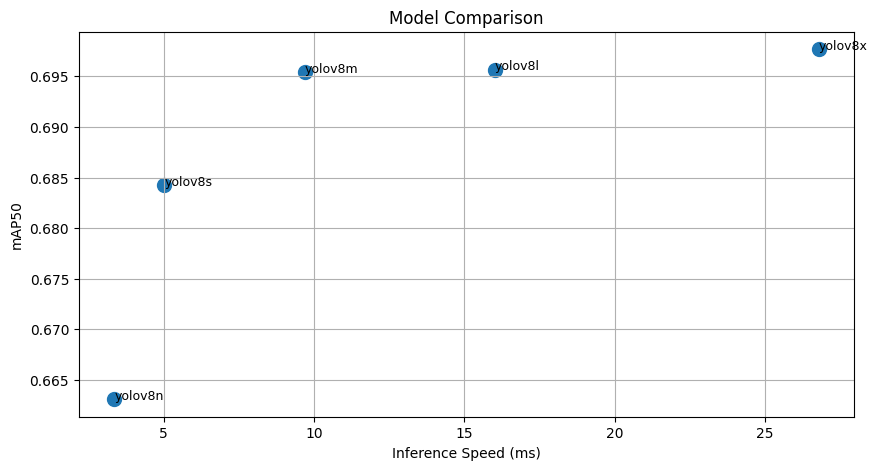

In [ ]:
# Plot mAP50 vs Speed
plt.figure(figsize=(10, 5))
plt.scatter(df['speed'], df['mAP50'], s=100)
for i, row in df.iterrows():
    plt.text(row['speed'], row['mAP50'], i.split('.')[0], fontsize=9)
plt.xlabel('Inference Speed (ms)')
plt.ylabel('mAP50')
plt.title('Model Comparison')
plt.grid()
plt.show()

In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Train only YOLOv8x
model_name = 'yolov8x.pt'

# Load model
model = YOLO(model_name)

# Train
result = model.train(
    data='/content/valorant/data.yaml',
    epochs=50,
    imgsz=640,
    batch=16,
    name=f'{model_name.split(".")[0]}_valorant'
)

# Store and print results
results = {
    model_name: {
        'mAP50': result.results_dict['metrics/mAP50(B)'],
        'speed': result.speed['inference']
    }
}

print(f"{model_name}: mAP50={results[model_name]['mAP50']:.2f}, Speed={results[model_name]['speed']:.2f}ms")

100%|██████████| 131M/131M [00:00<00:00, 290MB/s]


Ultralytics 8.3.101 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/content/valorant/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8x_valorant, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tru

100%|██████████| 755k/755k [00:00<00:00, 120MB/s]


Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1      2320  ultralytics.nn.modules.conv.Conv             [3, 80, 3, 2]                 
  1                  -1  1    115520  ultralytics.nn.modules.conv.Conv             [80, 160, 3, 2]               
  2                  -1  3    436800  ultralytics.nn.modules.block.C2f             [160, 160, 3, True]           
  3                  -1  1    461440  ultralytics.nn.modules.conv.Conv             [160, 320, 3, 2]              
  4                  -1  6   3281920  ultralytics.nn.modules.block.C2f             [320, 320, 6, True]           
  5                  -1  1   1844480  ultralytics.nn.modules.conv.Conv             [320, 640, 3, 2]              
  6                  -1  6  13117440  ultralytics.nn.modules.block.C2f             [640, 640, 6, True]           
  7                  -1  1   3687680  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 246MB/s]


AMP: checks passed ✅


train: Scanning /content/valorant/train/labels... 1254 images, 149 backgrounds, 0 corrupt: 100%|██████████| 1254/1254 [00:00<00:00, 1933.45it/s]

train: New cache created: /content/valorant/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/valorant/valid/labels... 235 images, 21 backgrounds, 0 corrupt: 100%|██████████| 235/235 [00:00<00:00, 1162.21it/s]

val: New cache created: /content/valorant/valid/labels.cache


Plotting labels to runs/detect/yolov8x_valorant/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolov8x_valorant
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      12.4G      1.728      2.511      1.411         12        640: 100%|██████████| 79/79 [01:39<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:09<00:00,  1.14s/it]

                   all        235        633      0.137      0.342      0.052     0.0228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      12.6G      2.005      2.114       1.63         22        640: 100%|██████████| 79/79 [01:42<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.02it/s]

                   all        235        633      0.148      0.211      0.104     0.0373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      12.5G      2.014      2.067      1.622         24        640: 100%|██████████| 79/79 [01:42<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.00it/s]

                   all        235        633     0.0012     0.0362    0.00065    0.00025



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      12.5G      1.935      1.808      1.576         17        640: 100%|██████████| 79/79 [01:42<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.02it/s]

                   all        235        633        0.7      0.339      0.368      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      12.3G       1.86      1.729      1.532         22        640: 100%|██████████| 79/79 [01:42<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.01it/s]

                   all        235        633      0.439      0.264      0.321      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      12.5G      1.811      1.558      1.506         27        640: 100%|██████████| 79/79 [01:42<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.03it/s]

                   all        235        633      0.449      0.385       0.37      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      12.5G      1.748      1.446       1.44         11        640: 100%|██████████| 79/79 [01:42<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.02it/s]

                   all        235        633      0.478      0.378      0.356      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      12.5G      1.741      1.462      1.412         12        640: 100%|██████████| 79/79 [01:41<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.02it/s]

                   all        235        633      0.644      0.383      0.417      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      12.3G      1.633      1.325      1.379         13        640: 100%|██████████| 79/79 [01:42<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.02it/s]

                   all        235        633      0.844      0.403      0.466      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      12.5G      1.601      1.266      1.323         29        640: 100%|██████████| 79/79 [01:41<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.03it/s]

                   all        235        633      0.523      0.429      0.482      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      12.5G      1.555       1.19      1.302         23        640: 100%|██████████| 79/79 [01:42<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.02it/s]

                   all        235        633      0.566      0.462      0.501      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      12.5G      1.578      1.188      1.321         17        640: 100%|██████████| 79/79 [01:42<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.03it/s]

                   all        235        633      0.842      0.448      0.506      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      12.3G      1.521      1.159      1.301         24        640: 100%|██████████| 79/79 [01:41<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.02it/s]

                   all        235        633      0.689      0.446      0.531        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      12.5G      1.452      1.072      1.273         19        640: 100%|██████████| 79/79 [01:42<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.01it/s]

                   all        235        633      0.656       0.44      0.522      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      12.5G      1.451      1.046      1.265         16        640: 100%|██████████| 79/79 [01:42<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.03it/s]

                   all        235        633      0.605      0.495      0.559      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      12.5G      1.373       0.99       1.22         25        640: 100%|██████████| 79/79 [01:41<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.03it/s]

                   all        235        633      0.563      0.475       0.53      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      12.3G      1.428      1.013      1.235         19        640: 100%|██████████| 79/79 [01:42<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.02it/s]

                   all        235        633      0.625      0.572      0.584      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      12.5G      1.383     0.9701      1.217         12        640: 100%|██████████| 79/79 [01:42<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.02it/s]

                   all        235        633      0.658      0.541      0.579      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      12.5G      1.288     0.8951      1.162         27        640: 100%|██████████| 79/79 [01:41<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.02it/s]

                   all        235        633      0.895      0.481      0.578      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      12.5G       1.29     0.9096      1.164         10        640: 100%|██████████| 79/79 [01:42<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.01it/s]

                   all        235        633      0.863      0.528      0.593       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      12.3G      1.288     0.8625      1.162         38        640: 100%|██████████| 79/79 [01:41<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.01it/s]

                   all        235        633       0.65      0.559      0.594      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      12.5G      1.238     0.8364      1.144         14        640: 100%|██████████| 79/79 [01:42<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.02it/s]

                   all        235        633      0.675      0.535      0.589      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      12.5G      1.218     0.8168      1.136         18        640: 100%|██████████| 79/79 [01:42<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.02it/s]

                   all        235        633      0.659      0.555      0.595      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      12.5G      1.192     0.8183       1.14         25        640: 100%|██████████| 79/79 [01:41<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.02it/s]

                   all        235        633      0.684      0.586      0.606      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      12.3G      1.208     0.8102      1.137         14        640: 100%|██████████| 79/79 [01:42<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.03it/s]

                   all        235        633      0.665      0.533      0.599       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      12.5G      1.153     0.7816      1.105         14        640: 100%|██████████| 79/79 [01:41<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.01it/s]

                   all        235        633      0.652      0.514      0.595      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      12.5G       1.16     0.7896      1.116         33        640: 100%|██████████| 79/79 [01:42<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.03it/s]

                   all        235        633       0.71       0.55      0.611      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      12.5G      1.127     0.7237      1.085         17        640: 100%|██████████| 79/79 [01:42<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.03it/s]

                   all        235        633      0.674      0.538      0.596      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      12.3G      1.081      0.711      1.071         38        640: 100%|██████████| 79/79 [01:41<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.02it/s]

                   all        235        633      0.936       0.54      0.617      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      12.5G      1.087     0.7091      1.072         12        640: 100%|██████████| 79/79 [01:41<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.04it/s]

                   all        235        633      0.739       0.55      0.622      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      12.5G      1.067     0.6923      1.068         17        640: 100%|██████████| 79/79 [01:42<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.02it/s]

                   all        235        633      0.676      0.552       0.61      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      12.6G       1.05     0.6899      1.074         15        640: 100%|██████████| 79/79 [01:41<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.03it/s]

                   all        235        633      0.694       0.54      0.624      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      12.3G     0.9997     0.6455       1.04         18        640: 100%|██████████| 79/79 [01:41<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.02it/s]

                   all        235        633      0.659      0.569      0.639      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      12.5G     0.9971     0.6378      1.037         25        640: 100%|██████████| 79/79 [01:41<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.03it/s]

                   all        235        633       0.71       0.56      0.622      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      12.5G     0.9999     0.6456      1.046         20        640: 100%|██████████| 79/79 [01:42<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.02it/s]

                   all        235        633      0.692      0.576      0.646      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      12.5G     0.9966     0.6403      1.044         19        640: 100%|██████████| 79/79 [01:42<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.02it/s]

                   all        235        633      0.663      0.565      0.632      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      12.3G     0.9506     0.6263      1.019         23        640: 100%|██████████| 79/79 [01:41<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.03it/s]

                   all        235        633      0.669      0.584      0.645      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      12.5G     0.9406     0.6054      1.026         32        640: 100%|██████████| 79/79 [01:42<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.02it/s]

                   all        235        633      0.701       0.62      0.656      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      12.5G     0.9313     0.6052      1.025         29        640: 100%|██████████| 79/79 [01:41<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.02it/s]

                   all        235        633      0.664        0.6      0.648       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      12.5G     0.9194     0.6024      1.016         38        640: 100%|██████████| 79/79 [01:42<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.02it/s]

                   all        235        633      0.671        0.6      0.651      0.446


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      12.2G     0.8638     0.5265     0.9731         19        640: 100%|██████████| 79/79 [01:42<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.02it/s]

                   all        235        633      0.701      0.584      0.641       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      12.5G     0.8238      0.494     0.9701         11        640: 100%|██████████| 79/79 [01:41<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.02it/s]

                   all        235        633      0.685      0.584      0.646       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      12.5G     0.8002      0.476     0.9525         14        640: 100%|██████████| 79/79 [01:41<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.02it/s]

                   all        235        633      0.717      0.589      0.662      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      12.5G     0.7895      0.474     0.9395         12        640: 100%|██████████| 79/79 [01:41<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.03it/s]

                   all        235        633      0.679      0.627       0.66      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      12.3G     0.7677     0.4492     0.9435         10        640: 100%|██████████| 79/79 [01:41<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.03it/s]

                   all        235        633      0.721      0.645      0.677      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      12.5G     0.7226     0.4358     0.9265         15        640: 100%|██████████| 79/79 [01:41<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.02it/s]

                   all        235        633      0.702      0.602       0.67      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      12.5G       0.73     0.4285     0.9198         19        640: 100%|██████████| 79/79 [01:41<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.04it/s]

                   all        235        633      0.713      0.617      0.668      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      12.6G      0.714     0.4259     0.9205         16        640: 100%|██████████| 79/79 [01:41<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.03it/s]

                   all        235        633      0.686      0.633      0.674      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      12.3G      0.691     0.4141     0.9133         15        640: 100%|██████████| 79/79 [01:41<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.01it/s]

                   all        235        633      0.689      0.621      0.668      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      12.5G     0.6774      0.428     0.9062         15        640: 100%|██████████| 79/79 [01:41<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.03it/s]

                   all        235        633      0.712      0.633      0.678      0.488



50 epochs completed in 1.668 hours.
Optimizer stripped from runs/detect/yolov8x_valorant/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/yolov8x_valorant/weights/best.pt, 136.7MB

Validating runs/detect/yolov8x_valorant/weights/best.pt...
Ultralytics 8.3.101 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 112 layers, 68,127,420 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.12s/it]


                   all        235        633      0.711      0.633      0.677      0.488
             crosshair        193        193      0.312     0.0611      0.122     0.0214
                 enemy        165        185       0.87      0.973       0.98      0.851
             enemyhead        156        176      0.861      0.574      0.657      0.393
              teammate         57         79      0.801      0.924      0.949      0.685
Speed: 0.3ms preprocess, 28.4ms inference, 0.0ms loss, 3.4ms postprocess per image
Results saved to runs/detect/yolov8x_valorant
yolov8x.pt: mAP50=0.68, Speed=28.44ms


In [ ]:
best_model = YOLO('/content/runs/detect/yolov8x_valorant/weights/best.pt')
best_model.export(format='onnx')

In [ ]:
from ultralytics import YOLO
import cv2
import os
import matplotlib.pyplot as plt

# Load the trained ONNX model
model = YOLO("/content/runs/detect/yolov8x_valorant/weights/best.onnx")

# Path to test images folder
test_folder = "/content/valorant/test/images/"

# Get all test images (limit to 9 for grid display)
image_files = [f for f in os.listdir(test_folder) if f.endswith(('.jpg', '.png'))][:9]

# Create figure for grid display
plt.figure(figsize=(15, 15))

# Process and display images in 3x3 grid
for i, img_file in enumerate(image_files, 1):
    img_path = os.path.join(test_folder, img_file)

    # Run detection
    results = model.predict(
        source=img_path,
        conf=0.25,
        imgsz=640
    )

    # Get annotated image
    annotated_img = results[0].plot(line_width=1, labels=True)
    annotated_img = cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB)

    # Add to grid
    plt.subplot(3, 3, i)
    plt.imshow(annotated_img)
    plt.title(f"Test Image {i}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
from ultralytics import YOLO
import cv2

# Load the trained model weights
model = YOLO("/content/runs/detect/yolov8x_valorant/weights/best.onnx")

# Open the video file
video_path = "/content/TestVideoVal2.mp4"
cap = cv2.VideoCapture(video_path)

# Get video properties
fps = int(cap.get(cv2.CAP_PROP_FPS))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Define the codec and create a VideoWriter to save the output video
output_path = "/content/Output_Val_test2.mp4"
fourcc = cv2.VideoWriter_fourcc(*"mp4v")
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

# Check if video opened successfully
if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

# Process the video frame by frame
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break  # Break the loop if there are no more frames

    # Run detection on the current frame
    results = model.predict(source=frame, conf=0.25)

    # Plot detections on the frame
    annotated_frame = results[0].plot()  # Annotate the frame with detection results

    # Write the annotated frame to the output video
    out.write(annotated_frame)

# Release resources
cap.release()
out.release()
print("Annotated video saved to:", output_path)


Streaming output truncated to the last 5000 lines.
Speed: 4.6ms preprocess, 59.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 61.9ms
Speed: 4.7ms preprocess, 61.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 63.0ms
Speed: 4.5ms preprocess, 63.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 61.5ms
Speed: 4.4ms preprocess, 61.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 61.0ms
Speed: 5.2ms preprocess, 61.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 61.9ms
Speed: 4.8ms preprocess, 61.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 62.0ms
Speed: 5.0ms preprocess, 62.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 59.7ms
Speed: 4.8ms prepr

In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = "/content/Output_Val_test2.mp4"

# Compressed video path
compressed_path = "result_compressed2.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

# Aim Analysis Part

Streaming output truncated to the last 5000 lines.
0: 640x640 (no detections), 63.3ms
Speed: 6.6ms preprocess, 63.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 64.0ms
Speed: 4.8ms preprocess, 64.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 64.7ms
Speed: 4.5ms preprocess, 64.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 65.9ms
Speed: 4.5ms preprocess, 65.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 66.4ms
Speed: 4.3ms preprocess, 66.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 65.8ms
Speed: 4.3ms preprocess, 65.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 65.5ms
Speed: 4.8ms preprocess, 65.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no det

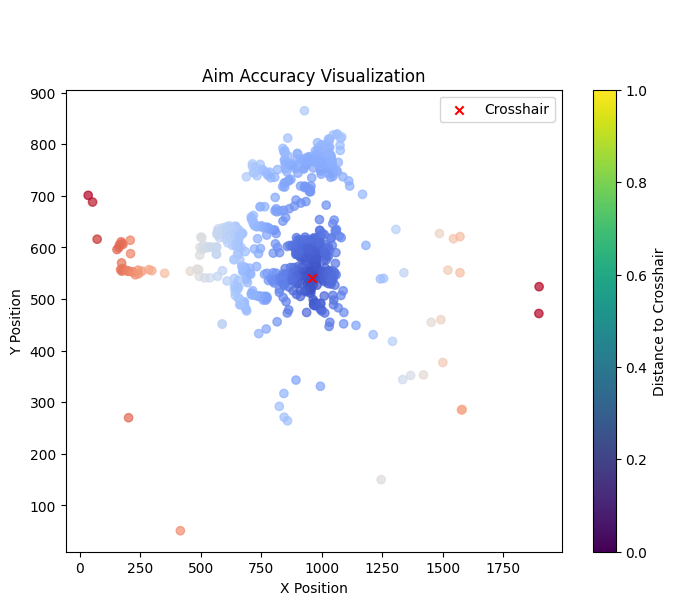

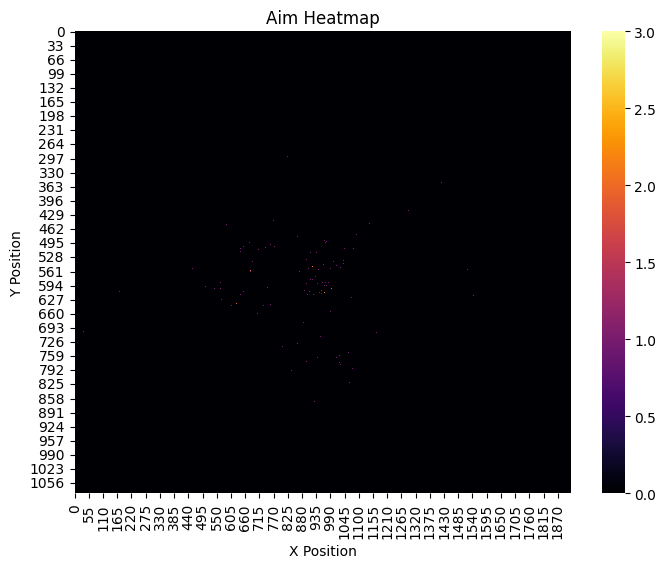


Feedback:
Your aim is concentrated around (974, 491). Your aim is well centered. Keep improving your accuracy!

Final Metrics:
Average Aim Accuracy: 188.66
Average Headshots per Image: 0.04
Average Enemy Engagements per Image: 0.51
Average Teammate Awareness per Image: 0.00


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ultralytics import YOLO

# Load the trained YOLO model
model = YOLO("/content/runs/detect/yolov8x_valorant/weights/best.onnx")

# Open the video file
video_path = "/content/TestVideoVal2.mp4"
cap = cv2.VideoCapture(video_path)

# Get video properties
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
crosshair_pos = (frame_width // 2, frame_height // 2)  # Crosshair at center

enemy_positions = []
distance_list = []
frame_count = 0

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break  # Stop if no more frames

    frame_count += 1
    results = model.predict(frame, conf=0.25)

    for result in results:
        for box in result.boxes.xywh:  # Get bounding boxes
            x, y, w, h = box.tolist()
            enemy_x, enemy_y = int(x), int(y)
            enemy_positions.append((enemy_x, enemy_y))

            # Calculate distance from crosshair to enemy
            distance = np.sqrt((enemy_x - crosshair_pos[0])**2 + (enemy_y - crosshair_pos[1])**2)
            distance_list.append(distance)

cap.release()

# Compute final metrics
avg_aim_accuracy = np.mean(distance_list) if distance_list else 0
avg_headshots_per_image = len([d for d in distance_list if d < 30]) / frame_count if frame_count else 0
avg_enemy_engagements_per_image = len(enemy_positions) / frame_count if frame_count else 0
avg_teammate_awareness_per_image = 0  # Placeholder if teammate data is available

# Scatter plot for aim accuracy
enemy_x, enemy_y = zip(*enemy_positions)
plt.figure(figsize=(8, 6))
plt.scatter(enemy_x, enemy_y, c=distance_list, cmap='coolwarm', alpha=0.7)
plt.scatter(*crosshair_pos, color='red', marker='x', label='Crosshair')
plt.colorbar(label='Distance to Crosshair')
plt.title("Aim Accuracy Visualization")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.legend()

# Add metrics to the image
plt.text(10, frame_height - 100, f"Avg Aim Accuracy: {avg_aim_accuracy:.2f}", fontsize=10, color='white')
plt.text(10, frame_height - 80, f"Avg Headshots: {avg_headshots_per_image:.2f}", fontsize=10, color='white')
plt.text(10, frame_height - 60, f"Avg Engagements: {avg_enemy_engagements_per_image:.2f}", fontsize=10, color='white')
plt.text(10, frame_height - 40, f"Teammate Awareness: {avg_teammate_awareness_per_image:.2f}", fontsize=10, color='white')
plt.show()

# Heatmap of aim positioning
aim_map = np.zeros((frame_height, frame_width))
for x, y in enemy_positions:
    if 0 <= y < frame_height and 0 <= x < frame_width:
        aim_map[y, x] += 1  # Increase density at detected aim points

plt.figure(figsize=(8, 6))
sns.heatmap(aim_map, cmap='inferno', cbar=True)
plt.title("Aim Heatmap")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.show()

# Generate Heatmap-Based Feedback
heatmap_peak = np.unravel_index(np.argmax(aim_map), aim_map.shape)  # Find the most targeted area
feedback = "Your aim is concentrated around ({}, {}). ".format(heatmap_peak[1], heatmap_peak[0])
if heatmap_peak[1] < frame_width // 3:
    feedback += "You tend to aim more towards the left side. Try practicing right-side adjustments."
elif heatmap_peak[1] > 2 * frame_width // 3:
    feedback += "You tend to aim more towards the right side. Consider balancing your aim."
else:
    feedback += "Your aim is well centered. Keep improving your accuracy!"

print("\nFeedback:")
print(feedback)

# Print final metrics
print("\nFinal Metrics:")
print(f"Average Aim Accuracy: {avg_aim_accuracy:.2f}")
print(f"Average Headshots per Image: {avg_headshots_per_image:.2f}")
print(f"Average Enemy Engagements per Image: {avg_enemy_engagements_per_image:.2f}")
print(f"Average Teammate Awareness per Image: {avg_teammate_awareness_per_image:.2f}")


# Aim Anlaysis using RL

Streaming output truncated to the last 5000 lines.
0: 640x640 (no detections), 70.8ms
Speed: 4.3ms preprocess, 70.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 61.2ms
Speed: 10.7ms preprocess, 61.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 67.3ms
Speed: 4.6ms preprocess, 67.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 64.3ms
Speed: 4.9ms preprocess, 64.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 66.7ms
Speed: 5.1ms preprocess, 66.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 67.1ms
Speed: 4.8ms preprocess, 67.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 72.6ms
Speed: 4.4ms preprocess, 72.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no de

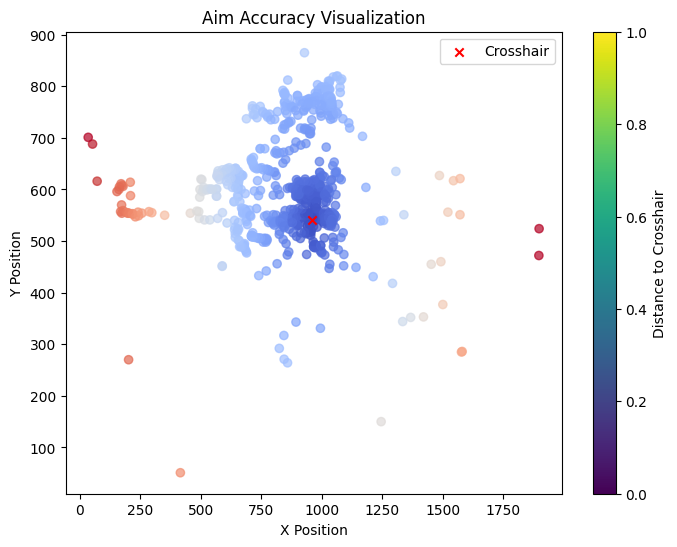

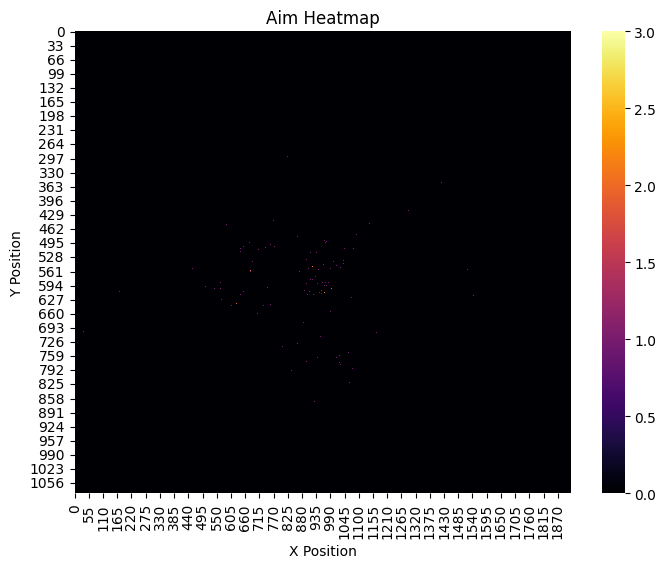


Post-Game Aim Feedback:
- You tend to aim too low. Try raising your aim slightly.
- Your aim drifts to the right. Try adjusting slightly to the left.


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ultralytics import YOLO
import random

# Load the trained YOLO model
model = YOLO("/content/runs/detect/yolov8x_valorant/weights/best.onnx")

# Open the video file
video_path = "/content/TestVideoVal2.mp4"
cap = cv2.VideoCapture(video_path)

# Get video properties
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
crosshair_pos = (frame_width // 2, frame_height // 2)  # Crosshair at center

# Q-learning parameters
q_table = {}
alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 0.1  # Exploration-exploitation tradeoff

# Tracking variables
enemy_positions = []
distance_list = []
frame_count = 0
adjustments = {"up": 0, "down": 0, "left": 0, "right": 0}

def choose_action(state):
    if state not in q_table:
        q_table[state] = {"up": 0, "down": 0, "left": 0, "right": 0}
    if random.uniform(0, 1) < epsilon:
        return random.choice(["up", "down", "left", "right"])
    return max(q_table[state], key=q_table[state].get)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break  # Stop if no more frames

    frame_count += 1
    results = model.predict(frame, conf=0.25)

    for result in results:
        for box in result.boxes.xywh:  # Get bounding boxes
            x, y, w, h = box.tolist()
            enemy_x, enemy_y = int(x), int(y)
            enemy_positions.append((enemy_x, enemy_y))

            # Calculate distance from crosshair to enemy
            distance = np.sqrt((enemy_x - crosshair_pos[0])**2 + (enemy_y - crosshair_pos[1])**2)
            distance_list.append(distance)

            # Determine aim adjustment
            state = (enemy_x, enemy_y)
            action = choose_action(state)

            # Reward system
            if distance < 20:  # Assume hit if close to the enemy
                reward = 10
            else:
                reward = -5
                adjustments[action] += 1  # Track needed adjustments

            # Q-learning update
            if state not in q_table:
                q_table[state] = {"up": 0, "down": 0, "left": 0, "right": 0}
            q_table[state][action] += alpha * (reward + gamma * max(q_table[state].values()) - q_table[state][action])

cap.release()

# Generate feedback
feedback_messages = []
if adjustments["up"] > adjustments["down"]:
    feedback_messages.append("You tend to aim too low. Try raising your aim slightly.")
elif adjustments["down"] > adjustments["up"]:
    feedback_messages.append("You tend to aim too high. Try lowering your aim for better accuracy.")

if adjustments["left"] > adjustments["right"]:
    feedback_messages.append("Your aim drifts to the right. Try adjusting slightly to the left.")
elif adjustments["right"] > adjustments["left"]:
    feedback_messages.append("Your aim drifts to the left. Try adjusting slightly to the right.")

# Scatter plot for aim accuracy
enemy_x, enemy_y = zip(*enemy_positions)
plt.figure(figsize=(8, 6))
plt.scatter(enemy_x, enemy_y, c=distance_list, cmap='coolwarm', alpha=0.7)
plt.scatter(*crosshair_pos, color='red', marker='x', label='Crosshair')
plt.colorbar(label='Distance to Crosshair')
plt.title("Aim Accuracy Visualization")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.legend()
plt.show()

# Heatmap of aim positioning
aim_map = np.zeros((frame_height, frame_width))
for x, y in enemy_positions:
    if 0 <= y < frame_height and 0 <= x < frame_width:
        aim_map[y, x] += 1  # Increase density at detected aim points

plt.figure(figsize=(8, 6))
sns.heatmap(aim_map, cmap='inferno', cbar=True)
plt.title("Aim Heatmap")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.show()

# Print feedback
print("\nPost-Game Aim Feedback:")
for msg in feedback_messages:
    print(f"- {msg}")


# Strategy Generation Part

## Extract Player Positions from Video using YOLO

In [ ]:
import cv2
import torch
import pandas as pd
from ultralytics import YOLO

# Load YOLO model
model = YOLO("/content/best.onnx")

# Load video
video_path = '/content/ValorantV2.mp4'
cap = cv2.VideoCapture(video_path)

frame_number = 0
data = []

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break  # End of video

    # Run YOLO detection
    results = model(frame)

    # Extract detected objects
    # Access the Results object within the list and ensure xyxy contains 4 values
    for result in results:
        if result.boxes is not None:  # Check if boxes are present
            for box in result.boxes:
                xyxy = box.xyxy[0]  # Get the bounding box coordinates
                if len(xyxy) == 4:  # Ensure there are 4 coordinates
                    x1, y1, x2, y2 = map(int, xyxy)  # Bounding box
                    width, height = x2 - x1, y2 - y1
                    class_name = model.names[int(box.cls[0])]

                    # Save data
                    data.append([frame_number, class_name, x1, y1, width, height, box.conf[0].item()])
                else:
                    print(f"Skipping detection with unexpected coordinates: {xyxy}")

    frame_number += 1

cap.release()

# Convert to DataFrame & Save
df = pd.DataFrame(data, columns=["Frame", "Class", "X", "Y", "Width", "Height", "Confidence"])
df.to_csv("player_positions.csv", index=False)
print("✅ Player positions saved to player_positions.csv")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
WARNING ⚠️ Unable to automatically guess model task, assuming 'task=detect'. Explicitly define task for your model, i.e. 'task=detect', 'segment', 'classify','pose' or 'obb'.
Loading /content/best.onnx for ONNX Runtime inference...
requirements: Ultralytics requirements ['onnx', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 293.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.8/280.8 MB 274.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 271.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 178.5 MB/s eta 0:00:00

requirements: AutoUpdate success

KeyboardInterrupt: 

## Movement Pattern Analysis

In [ ]:
df = pd.read_csv("player_positions.csv")

In [ ]:
df["Center_X"] = df["X"] + df["Width"] // 2
df["Center_Y"] = df["Y"] + df["Height"] // 2

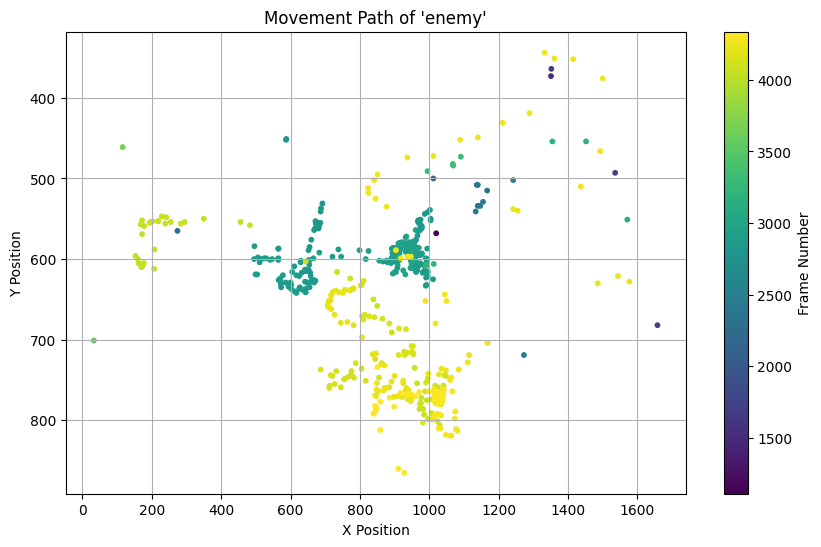

In [ ]:
import matplotlib.pyplot as plt

# Filter by class
class_to_plot = 'enemy'
enemy_data = df[df["Class"] == class_to_plot]

plt.figure(figsize=(10, 6))
plt.title(f"Movement Path of '{class_to_plot}'")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.scatter(enemy_data["Center_X"], enemy_data["Center_Y"], c=enemy_data["Frame"], cmap="viridis", s=10)
plt.colorbar(label="Frame Number")
plt.gca().invert_yaxis()  # Optional: makes it more like a top-down map
plt.grid(True)
plt.show()


## Rule-Based Strategy Plan generation

In [ ]:
import pandas as pd
import numpy as np # Needed for NaN checking and calculations
import cv2 # Needed to get FPS for timestamps

# --- Pre-computation ---
df = pd.read_csv("player_positions.csv")
# 1. Calculate Center Coordinates (from Cell 5)
df["Center_X"] = df["X"] + df["Width"] // 2
df["Center_Y"] = df["Y"] + df["Height"] // 2


# Option B: Using 30 frames per window (as in Cell 24, more standard for 1 second at 30fps)
WINDOW_SIZE_FRAMES = 30
df["Time_Window"] = df["Frame"] // WINDOW_SIZE_FRAMES

# 3. Filter for enemies (used in multiple sections)
enemies_df = df[df["Class"] == "enemy"].copy()

# 4. Get FPS for timestamp conversion
video_path = '/content/ValorantV2.mp4' # Make sure this path is correct
cap = cv2.VideoCapture(video_path)
fps = cap.get(cv2.CAP_PROP_FPS)
if fps == 0: # Handle case where FPS couldn't be read
    print("Warning: Could not read FPS from video. Using default 30 FPS for timestamps.")
    fps = 30
cap.release()

def frame_to_time(frame_index, fps_rate):
    """Converts a frame index to a MM:SS timestamp string."""
    total_seconds = int(frame_index / fps_rate)
    minutes = total_seconds // 60
    seconds = total_seconds % 60
    return f"{minutes:02d}:{seconds:02d}"

# --- Tactic 1: Rush Detection (from Cells 9 & 11) ---

def detect_rush(enemy_data, rush_threshold=4):
    """
    Identifies time windows where the number of detected enemies meets or exceeds a threshold.

    Args:
        enemy_data (pd.DataFrame): DataFrame containing only enemy detections with a 'Time_Window' column.
        rush_threshold (int): Minimum number of enemies in a window to be considered a rush.

    Returns:
        list: A list of time window indices where a rush is detected.
    """
    if enemy_data.empty:
        return []
    # Count enemies per time window
    grouped = enemy_data.groupby("Time_Window")["Class"].count().reset_index(name="Enemy_Count")
    # Find windows meeting the threshold
    rush_windows = grouped[grouped["Enemy_Count"] >= rush_threshold]["Time_Window"].tolist()
    return rush_windows

# --- Tactic 2: Flank Detection (from Cells 10 & 11) ---

def detect_flanks(enemy_data, left_threshold=400, right_threshold=1000):
    """
    Identifies time windows where enemies are detected in predefined flank zones.

    Args:
        enemy_data (pd.DataFrame): DataFrame containing enemy detections with 'X' and 'Time_Window'.
        left_threshold (int): X-coordinate threshold defining the left flank zone.
        right_threshold (int): X-coordinate threshold defining the right flank zone.

    Returns:
        tuple: (list_of_left_flank_windows, list_of_right_flank_windows)
    """
    if enemy_data.empty:
        return [], []
    # Filter enemies in the left flank zone
    left_flanks = enemy_data[enemy_data["X"] < left_threshold]
    left_flank_windows = sorted(left_flanks['Time_Window'].unique().tolist()) if not left_flanks.empty else []

    # Filter enemies in the right flank zone
    right_flanks = enemy_data[enemy_data["X"] > right_threshold]
    right_flank_windows = sorted(right_flanks['Time_Window'].unique().tolist()) if not right_flanks.empty else []

    return left_flank_windows, right_flank_windows

# --- Tactic 3: Movement Type Analysis (from Cells 13-16) ---

def analyze_movement_type(enemy_data, hold_thresh=5, walk_thresh=30):
    """
    Calculates frame-to-frame movement and classifies it.

    Args:
        enemy_data (pd.DataFrame): DataFrame of enemy detections, MUST contain 'X', 'Y', 'Frame'.
                                   It will be modified in place.
        hold_thresh (float): Max distance moved per frame to be considered "Holding".
        walk_thresh (float): Max distance moved per frame to be considered "Walking".

    Returns:
        pd.DataFrame: The input DataFrame with added 'X_Diff', 'Y_Diff', 'Movement', 'Movement_Type' columns.
    """
    if enemy_data.empty:
        enemy_data["Movement_Type"] = "Unknown"
        return enemy_data

    # Sort by frame to calculate differences correctly
    enemy_data = enemy_data.sort_values(by="Frame")

    # Calculate movement deltas (difference from the previous frame)
    # Grouping by 'Class' might be needed if df contained multiple types initially,
    # but here we assume enemy_data is already filtered.
    enemy_data["X_Diff"] = enemy_data["X"].diff()
    enemy_data["Y_Diff"] = enemy_data["Y"].diff()

    # Calculate total movement distance
    enemy_data["Movement"] = np.sqrt(enemy_data["X_Diff"]**2 + enemy_data["Y_Diff"]**2)

    # Define the classification function
    def movement_classifier(movement_distance):
        if pd.isna(movement_distance):
            return "Unknown" # First frame or gap in detection
        if movement_distance < hold_thresh:
            return "Holding"
        elif movement_distance < walk_thresh:
            return "Walking"
        else:
            return "Rushing"

    # Apply the classification
    enemy_data["Movement_Type"] = enemy_data["Movement"].apply(movement_classifier)

    return enemy_data

def summarize_movement(analyzed_enemy_data):
    """Summarizes movement types per time window."""
    if analyzed_enemy_data.empty or "Movement_Type" not in analyzed_enemy_data.columns:
        return pd.DataFrame(columns=["Holding", "Rushing", "Unknown", "Walking"]) # Empty structure
    movement_summary = analyzed_enemy_data.groupby(["Time_Window", "Movement_Type"]).size().unstack(fill_value=0)
    # Ensure all columns exist, even if no instances were found
    for col in ["Holding", "Rushing", "Unknown", "Walking"]:
        if col not in movement_summary.columns:
            movement_summary[col] = 0
    return movement_summary[["Holding", "Rushing", "Unknown", "Walking"]] # Consistent order

# --- Tactic 4: Zone-Based Analysis (from Cells 18-20) ---
# Using the simpler zone definition from Cell 24 for consistency with Rotation

def assign_zone_simple(x, video_width=1920): # Assuming 1920x1080 resolution, adjust if needed
    """Assigns a zone based on X-coordinate (adjust thresholds based on map/resolution)."""
    # Example thresholds for a typical 3-lane map view
    a_boundary = video_width / 3
    b_boundary = (video_width / 3) * 2
    if x < a_boundary:
        return "A Site" # Typically Left
    elif x < b_boundary:
        return "Mid"    # Typically Center
    else:
        return "B Site" # Typically Right (Used 'Other' in cell 24, renaming for clarity)

def analyze_zone_presence(enemy_data, video_width=1920):
    """Calculates enemy counts per zone per time window."""
    if enemy_data.empty:
        return pd.DataFrame(columns=["A Site", "Mid", "B Site"]) # Empty structure

    enemy_data["Zone"] = enemy_data["X"].apply(lambda x: assign_zone_simple(x, video_width))
    zone_trend = enemy_data.groupby(["Time_Window", "Zone"]).size().unstack(fill_value=0)
    # Ensure all zone columns exist
    for zone in ["A Site", "Mid", "B Site"]:
        if zone not in zone_trend.columns:
            zone_trend[zone] = 0
    return zone_trend[["A Site", "Mid", "B Site"]] # Consistent order

# --- Tactic 5: Rotation/Transition Detection (from Cells 23-25) ---

def detect_transitions(zone_counts_per_window, fps_rate, count_threshold=2):
    """
    Detects potential rotations or disappearances based on changes in zone counts.

    Args:
        zone_counts_per_window (pd.DataFrame): DataFrame indexed by Time_Window with zones as columns.
        fps_rate (float): Frames per second of the video for timestamping.
        count_threshold (int): Minimum change in count to trigger a transition detection.

    Returns:
        list: A list of strings describing detected transitions with timestamps.
    """
    if zone_counts_per_window.empty:
        return []

    zone_diff = zone_counts_per_window.diff().fillna(0)
    transitions = []
    zones = zone_counts_per_window.columns # Get zone names like ['A Site', 'Mid', 'B Site']

    for idx in zone_diff.index:
        if idx == 0: # Skip the first window as there's no previous window to compare
            continue

        row_diff = zone_diff.loc[idx]
        current_counts = zone_counts_per_window.loc[idx]
        prev_counts = zone_counts_per_window.shift(1).loc[idx] # Get previous window's counts

        # Use actual frame number corresponding to the start of the window for timestamp
        start_frame_of_window = idx * WINDOW_SIZE_FRAMES
        time_str = frame_to_time(start_frame_of_window, fps_rate)

        # Detect rotations BETWEEN zones (Example: Mid to A)
        for zone_from in zones:
            for zone_to in zones:
                if zone_from == zone_to:
                    continue
                # Check if count decreased significantly in 'zone_from' AND increased in 'zone_to'
                if row_diff[zone_from] < -count_threshold and row_diff[zone_to] > count_threshold:
                     transitions.append(f"🔄 {time_str}: Possible {zone_from} to {zone_to} rotation.")

        # Detect disappearances FROM a zone
        for zone in zones:
            # Check if count is now zero (or low) but was high previously
            if current_counts[zone] <= 1 and prev_counts[zone] > count_threshold:
                 transitions.append(f"👻 {time_str}: Enemies disappeared from {zone} – Possible rotate out or lurk.")

    return transitions




# Load data
df = pd.read_csv("player_positions.csv")

# Pre-computation
df["Center_X"] = df["X"] + df["Width"] // 2
df["Center_Y"] = df["Y"] + df["Height"] // 2
df["Time_Window"] = df["Frame"] // WINDOW_SIZE_FRAMES
enemies_df = df[df["Class"] == "enemy"].copy()

# --- Generate Tactical Info ---

# 1. Rushes
rush_windows = detect_rush(enemies_df, rush_threshold=4)
if rush_windows:
    print("⚠️ Detected possible rush in time windows:", rush_windows)
else:
    print("✅ No significant rush detected.")

# 2. Flanks (Using example thresholds, adjust these!)
left_flank_windows, right_flank_windows = detect_flanks(enemies_df, left_threshold=400, right_threshold=1500) # Adjusted right threshold example
if left_flank_windows:
    print(f"🕵️ Flank possibly developing on the LEFT side in windows: {left_flank_windows}")
if right_flank_windows:
    print(f"🕵️ Flank possibly developing on the RIGHT side in windows: {right_flank_windows}")

# 3. Movement Analysis
enemies_df = analyze_movement_type(enemies_df)
movement_summary = summarize_movement(enemies_df)
print("\n📊 Movement Summary (Last 5 Windows):")
print(movement_summary.tail())
# You could add logic here to check for high 'Rushing' counts in recent windows

# 4. Zone Presence
zone_counts = analyze_zone_presence(enemies_df)
print("\n📍 Zone Presence Summary (Last 5 Windows):")
print(zone_counts.tail())

# 5. Transitions
transitions = detect_transitions(zone_counts, fps, count_threshold=2)
print("\n🧭 Detected Transitions/Rotations:")
if transitions:
    for t in transitions:
        print("•", t)
else:
    print("• None significant detected.")

# --- Generate Strategy Summary ---
strategy_summary = []

# Add rush info
if rush_windows:
    strategy_summary.append(f"🔺 High enemy concentration detected around time windows: {rush_windows}. Potential RUSH.")

# Add flank info
if left_flank_windows:
    strategy_summary.append(f"👈 Potential flank threat from LEFT side (windows {left_flank_windows}).")
if right_flank_windows:
    strategy_summary.append(f"👉 Potential flank threat from RIGHT side (windows {right_flank_windows}).")

# Add zone info
if not zone_counts.empty:
    most_active_zone = zone_counts.sum().idxmax()
    strategy_summary.append(f"📍 Most enemy presence overall was in **{most_active_zone}**.")
    # Check recent trends
    recent_zone = zone_counts.tail(1).idxmax(axis=1).iloc[0]
    if recent_zone != most_active_zone:
         strategy_summary.append(f"   -> Recently ({frame_to_time(zone_counts.index[-1]*WINDOW_SIZE_FRAMES, fps)}), focus shifted towards **{recent_zone}**.")
    elif most_active_zone == recent_zone:
         strategy_summary.append(f"   -> They are currently focused on **{most_active_zone}**.")


# Add transition info
if transitions:
    strategy_summary.append("🔄 Observed movements:")
    strategy_summary.extend([f"   - {t}" for t in transitions])

if not strategy_summary:
    strategy_summary.append("✅ No specific strong threats identified based on current rules.")

# Print final summary
print("\n\n📄 Strategy Summary Report:\n")
print("\n".join(strategy_summary))

⚠️ Detected possible rush in time windows: [80, 94, 95, 96, 97, 98, 99, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144]
🕵️ Flank possibly developing on the LEFT side in windows: [75, 118, 122, 134, 135]
🕵️ Flank possibly developing on the RIGHT side in windows: [57, 105, 141]

📊 Movement Summary (Last 5 Windows):
Movement_Type  Holding  Rushing  Unknown  Walking
Time_Window                                      
140                  5        0        0       25
141                  0       24        0        4
142                  2        8        0       20
143                  9        0        0       21
144                  0        7        0       10

📍 Zone Presence Summary (Last 5 Windows):
Zone         A Site  Mid  B Site
Time_Window                     
140               1   29       0
141               0   21       7
142               0   30       0
143               0   30       0
144               0   17       0

🧭 Detected Transitions/Rotations:
• 👻 00:41: Enemies 

## RL Based method

In [ ]:
import pandas as pd
import numpy as np # Needed for NaN checking and calculations
import cv2 # Needed to get FPS for timestamps

# --- Pre-computation ---
df = pd.read_csv("player_positions.csv")
# 1. Calculate Center Coordinates (from Cell 5)
df["Center_X"] = df["X"] + df["Width"] // 2
df["Center_Y"] = df["Y"] + df["Height"] // 2


# Option B: Using 30 frames per window (as in Cell 24, more standard for 1 second at 30fps)
WINDOW_SIZE_FRAMES = 30
df["Time_Window"] = df["Frame"] // WINDOW_SIZE_FRAMES

# 3. Filter for enemies (used in multiple sections)
enemies_df = df[df["Class"] == "enemy"].copy()

# 4. Get FPS for timestamp conversion (from Cell 21)
video_path = '/content/ValorantV2.mp4' # Make sure this path is correct
cap = cv2.VideoCapture(video_path)
fps = cap.get(cv2.CAP_PROP_FPS)
if fps == 0: # Handle case where FPS couldn't be read
    print("Warning: Could not read FPS from video. Using default 30 FPS for timestamps.")
    fps = 30
cap.release()

def frame_to_time(frame_index, fps_rate):
    """Converts a frame index to a MM:SS timestamp string."""
    total_seconds = int(frame_index / fps_rate)
    minutes = total_seconds // 60
    seconds = total_seconds % 60
    return f"{minutes:02d}:{seconds:02d}"

# --- Tactic 1: Rush Detection (from Cells 9 & 11) ---

def detect_rush(enemy_data, rush_threshold=4):
    """
    Identifies time windows where the number of detected enemies meets or exceeds a threshold.

    Args:
        enemy_data (pd.DataFrame): DataFrame containing only enemy detections with a 'Time_Window' column.
        rush_threshold (int): Minimum number of enemies in a window to be considered a rush.

    Returns:
        list: A list of time window indices where a rush is detected.
    """
    if enemy_data.empty:
        return []
    # Count enemies per time window
    grouped = enemy_data.groupby("Time_Window")["Class"].count().reset_index(name="Enemy_Count")
    # Find windows meeting the threshold
    rush_windows = grouped[grouped["Enemy_Count"] >= rush_threshold]["Time_Window"].tolist()
    return rush_windows

# --- Tactic 2: Flank Detection (from Cells 10 & 11) ---

def detect_flanks(enemy_data, left_threshold=400, right_threshold=1000):
    """
    Identifies time windows where enemies are detected in predefined flank zones.

    Args:
        enemy_data (pd.DataFrame): DataFrame containing enemy detections with 'X' and 'Time_Window'.
        left_threshold (int): X-coordinate threshold defining the left flank zone.
        right_threshold (int): X-coordinate threshold defining the right flank zone.

    Returns:
        tuple: (list_of_left_flank_windows, list_of_right_flank_windows)
    """
    if enemy_data.empty:
        return [], []
    # Filter enemies in the left flank zone
    left_flanks = enemy_data[enemy_data["X"] < left_threshold]
    left_flank_windows = sorted(left_flanks['Time_Window'].unique().tolist()) if not left_flanks.empty else []

    # Filter enemies in the right flank zone
    right_flanks = enemy_data[enemy_data["X"] > right_threshold]
    right_flank_windows = sorted(right_flanks['Time_Window'].unique().tolist()) if not right_flanks.empty else []

    return left_flank_windows, right_flank_windows

# --- Tactic 3: Movement Type Analysis (from Cells 13-16) ---

def analyze_movement_type(enemy_data, hold_thresh=5, walk_thresh=30):
    """
    Calculates frame-to-frame movement and classifies it.

    Args:
        enemy_data (pd.DataFrame): DataFrame of enemy detections, MUST contain 'X', 'Y', 'Frame'.
                                   It will be modified in place.
        hold_thresh (float): Max distance moved per frame to be considered "Holding".
        walk_thresh (float): Max distance moved per frame to be considered "Walking".

    Returns:
        pd.DataFrame: The input DataFrame with added 'X_Diff', 'Y_Diff', 'Movement', 'Movement_Type' columns.
    """
    if enemy_data.empty:
        enemy_data["Movement_Type"] = "Unknown"
        return enemy_data

    # Sort by frame to calculate differences correctly
    enemy_data = enemy_data.sort_values(by="Frame")

    # Calculate movement deltas (difference from the previous frame)
    # Grouping by 'Class' might be needed if df contained multiple types initially,
    # but here we assume enemy_data is already filtered.
    enemy_data["X_Diff"] = enemy_data["X"].diff()
    enemy_data["Y_Diff"] = enemy_data["Y"].diff()

    # Calculate total movement distance
    enemy_data["Movement"] = np.sqrt(enemy_data["X_Diff"]**2 + enemy_data["Y_Diff"]**2)

    # Define the classification function
    def movement_classifier(movement_distance):
        if pd.isna(movement_distance):
            return "Unknown" # First frame or gap in detection
        if movement_distance < hold_thresh:
            return "Holding"
        elif movement_distance < walk_thresh:
            return "Walking"
        else:
            return "Rushing"

    # Apply the classification
    enemy_data["Movement_Type"] = enemy_data["Movement"].apply(movement_classifier)

    return enemy_data

def summarize_movement(analyzed_enemy_data):
    """Summarizes movement types per time window."""
    if analyzed_enemy_data.empty or "Movement_Type" not in analyzed_enemy_data.columns:
        return pd.DataFrame(columns=["Holding", "Rushing", "Unknown", "Walking"]) # Empty structure
    movement_summary = analyzed_enemy_data.groupby(["Time_Window", "Movement_Type"]).size().unstack(fill_value=0)
    # Ensure all columns exist, even if no instances were found
    for col in ["Holding", "Rushing", "Unknown", "Walking"]:
        if col not in movement_summary.columns:
            movement_summary[col] = 0
    return movement_summary[["Holding", "Rushing", "Unknown", "Walking"]] # Consistent order

# --- Tactic 4: Zone-Based Analysis (from Cells 18-20) ---
# Using the simpler zone definition from Cell 24 for consistency with Rotation

def assign_zone_simple(x, video_width=1920): # Assuming 1920x1080 resolution
    """Assigns a zone based on X-coordinate (adjust thresholds based on map/resolution)."""
    # Example thresholds for a typical 3-lane map view
    a_boundary = video_width / 3
    b_boundary = (video_width / 3) * 2
    if x < a_boundary:
        return "A Site" # Typically Left
    elif x < b_boundary:
        return "Mid"    # Typically Center
    else:
        return "B Site" # Typically Right (Used 'Other' in cell 24, renaming for clarity)

def analyze_zone_presence(enemy_data, video_width=1920):
    """Calculates enemy counts per zone per time window."""
    if enemy_data.empty:
        return pd.DataFrame(columns=["A Site", "Mid", "B Site"]) # Empty structure

    enemy_data["Zone"] = enemy_data["X"].apply(lambda x: assign_zone_simple(x, video_width))
    zone_trend = enemy_data.groupby(["Time_Window", "Zone"]).size().unstack(fill_value=0)
    # Ensure all zone columns exist
    for zone in ["A Site", "Mid", "B Site"]:
        if zone not in zone_trend.columns:
            zone_trend[zone] = 0
    return zone_trend[["A Site", "Mid", "B Site"]] # Consistent order

# --- Tactic 5: Rotation/Transition Detection (from Cells 23-25) ---

def detect_transitions(zone_counts_per_window, fps_rate, count_threshold=2):
    """
    Detects potential rotations or disappearances based on changes in zone counts.

    Args:
        zone_counts_per_window (pd.DataFrame): DataFrame indexed by Time_Window with zones as columns.
        fps_rate (float): Frames per second of the video for timestamping.
        count_threshold (int): Minimum change in count to trigger a transition detection.

    Returns:
        list: A list of strings describing detected transitions with timestamps.
    """
    if zone_counts_per_window.empty:
        return []

    zone_diff = zone_counts_per_window.diff().fillna(0)
    transitions = []
    zones = zone_counts_per_window.columns # Get zone names like ['A Site', 'Mid', 'B Site']

    for idx in zone_diff.index:
        if idx == 0: # Skip the first window as there's no previous window to compare
            continue

        row_diff = zone_diff.loc[idx]
        current_counts = zone_counts_per_window.loc[idx]
        prev_counts = zone_counts_per_window.shift(1).loc[idx] # Get previous window's counts

        # Use actual frame number corresponding to the start of the window for timestamp
        start_frame_of_window = idx * WINDOW_SIZE_FRAMES
        time_str = frame_to_time(start_frame_of_window, fps_rate)

        # Detect rotations BETWEEN zones (Example: Mid to A)
        for zone_from in zones:
            for zone_to in zones:
                if zone_from == zone_to:
                    continue
                # Check if count decreased significantly in 'zone_from' AND increased in 'zone_to'
                if row_diff[zone_from] < -count_threshold and row_diff[zone_to] > count_threshold:
                     transitions.append(f"🔄 {time_str}: Possible {zone_from} to {zone_to} rotation.")

        # Detect disappearances FROM a zone
        for zone in zones:
            # Check if count is now zero (or low) but was high previously
            if current_counts[zone] <= 1 and prev_counts[zone] > count_threshold:
                 transitions.append(f"👻 {time_str}: Enemies disappeared from {zone} – Possible rotate out or lurk.")

    return transitions


# --- Example Usage ---

# Load data
df = pd.read_csv("player_positions.csv")

# Pre-computation
df["Center_X"] = df["X"] + df["Width"] // 2
df["Center_Y"] = df["Y"] + df["Height"] // 2
df["Time_Window"] = df["Frame"] // WINDOW_SIZE_FRAMES
enemies_df = df[df["Class"] == "enemy"].copy()

# --- Generate Tactical Info ---

# 1. Rushes
rush_windows = detect_rush(enemies_df, rush_threshold=4)
if rush_windows:
    print("⚠️ Detected possible rush in time windows:", rush_windows)
else:
    print("✅ No significant rush detected.")

# 2. Flanks (Using example thresholds, adjust these!)
left_flank_windows, right_flank_windows = detect_flanks(enemies_df, left_threshold=400, right_threshold=1500)
if left_flank_windows:
    print(f"🕵️ Flank possibly developing on the LEFT side in windows: {left_flank_windows}")
if right_flank_windows:
    print(f"🕵️ Flank possibly developing on the RIGHT side in windows: {right_flank_windows}")

# 3. Movement Analysis
enemies_df = analyze_movement_type(enemies_df)
movement_summary = summarize_movement(enemies_df)
print("\n📊 Movement Summary (Last 5 Windows):")
print(movement_summary.tail())
# You could add logic here to check for high 'Rushing' counts in recent windows

# 4. Zone Presence
zone_counts = analyze_zone_presence(enemies_df)
print("\n📍 Zone Presence Summary (Last 5 Windows):")
print(zone_counts.tail())

# 5. Transitions
transitions = detect_transitions(zone_counts, fps, count_threshold=2)
print("\n🧭 Detected Transitions/Rotations:")
if transitions:
    for t in transitions:
        print("•", t)
else:
    print("• None significant detected.")

# --- Generate Strategy Summary ---
strategy_summary = []

# Add rush info
if rush_windows:
    strategy_summary.append(f"🔺 High enemy concentration detected around time windows: {rush_windows}. Potential RUSH.")

# Add flank info
if left_flank_windows:
    strategy_summary.append(f"👈 Potential flank threat from LEFT side (windows {left_flank_windows}).")
if right_flank_windows:
    strategy_summary.append(f"👉 Potential flank threat from RIGHT side (windows {right_flank_windows}).")

# Add zone info
if not zone_counts.empty:
    most_active_zone = zone_counts.sum().idxmax()
    strategy_summary.append(f"📍 Most enemy presence overall was in **{most_active_zone}**.")
    # Check recent trends
    recent_zone = zone_counts.tail(1).idxmax(axis=1).iloc[0]
    if recent_zone != most_active_zone:
         strategy_summary.append(f"   -> Recently ({frame_to_time(zone_counts.index[-1]*WINDOW_SIZE_FRAMES, fps)}), focus shifted towards **{recent_zone}**.")
    elif most_active_zone == recent_zone:
         strategy_summary.append(f"   -> They are currently focused on **{most_active_zone}**.")


# Add transition info
if transitions:
    strategy_summary.append("🔄 Observed movements:")
    strategy_summary.extend([f"   - {t}" for t in transitions])

if not strategy_summary:
    strategy_summary.append("✅ No specific strong threats identified based on current rules.")

# Print final summary
print("\n\n📄 Strategy Summary Report:\n")
print("\n".join(strategy_summary))

⚠️ Detected possible rush in time windows: [80, 94, 95, 96, 97, 98, 99, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144]
🕵️ Flank possibly developing on the LEFT side in windows: [75, 118, 122, 134, 135]
🕵️ Flank possibly developing on the RIGHT side in windows: [57, 105, 141]

📊 Movement Summary (Last 5 Windows):
Movement_Type  Holding  Rushing  Unknown  Walking
Time_Window                                      
140                  5        0        0       25
141                  0       24        0        4
142                  2        8        0       20
143                  9        0        0       21
144                  0        7        0       10

📍 Zone Presence Summary (Last 5 Windows):
Zone         A Site  Mid  B Site
Time_Window                     
140               1   29       0
141               0   21       7
142               0   30       0
143               0   30       0
144               0   17       0

🧭 Detected Transitions/Rotations:
• 👻 00:41: Enemies 

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("strategies.csv")

# List of strategies to check
strategies_to_check = [
    "Enemies disappeared from Mid – Possible rotate out or lurk.",
    "Possible Mid to A Site rotation.",
    "Possible A Site to Mid rotation.",
    "Enemies disappeared from A Site – Possible rotate out or lurk."
]

# Track results
results = []

for strategy in strategies_to_check:
    if strategy in df["Suggested Action"].values:
        results.append((strategy, "✅ Exact match"))
    else:
        # Check for partial match
        partial_matches = df[df["Suggested Action"].str.contains(strategy, case=False, na=False)]
        if not partial_matches.empty:
            results.append((strategy, "🔍 Partial match"))
        else:
            results.append((strategy, "❌ No match"))

# Print detailed report
print("\n📊 Strategy Match Report:")
for strat, status in results:
    print(f"- {status}: {strat}")

# Calculate and print match score
total = len(strategies_to_check)
exact = sum(1 for r in results if "Exact" in r[1])
partial = sum(1 for r in results if "Partial" in r[1])
none = total - (exact + partial)

print(f"\n✅ Exact Matches: {exact}/{total}")
print(f"🔍 Partial Matches: {partial}/{total}")
print(f"❌ No Matches: {none}/{total}")
print(f"📈 Match Score: {(exact + 0.5 * partial) / total * 100:.2f}%")



📊 Strategy Match Report:
- ✅ Exact match: Enemies disappeared from Mid – Possible rotate out or lurk.
- ✅ Exact match: Possible Mid to A Site rotation.
- ❌ No match: Possible A Site to Mid rotation.
- ✅ Exact match: Enemies disappeared from A Site – Possible rotate out or lurk.

✅ Exact Matches: 3/4
🔍 Partial Matches: 0/4
❌ No Matches: 1/4
📈 Match Score: 75.00%
